In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis

In [2]:
dataprep.new_hdf5('peakidentify_calibration_testML')

In [3]:

dataprep.add_calibration('peakidentify_calibration_testML.hdf5',
                          '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx',
                          label='Hydrogen')
dataprep.add_calibration('peakidentify_calibration_testML.hdf5',
                          '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx',
                          label='CarbonMonoxide')
dataprep.add_calibration('peakidentify_calibration_testML.hdf5','../ramandecompy/tests/test_files/CO2_100wt%.csv',label='CO2')
dataprep.add_calibration('peakidentify_calibration_testML.hdf5','../ramandecompy/tests/test_files/water.xlsx',label='H2O')
dataprep.add_calibration('peakidentify_calibration_testML.hdf5','../ramandecompy/tests/test_files/sapphire.xlsx',label='sapphire')

Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to peakidentify_calibration_testML.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to peakidentify_calibration_testML.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model. Results saved to peakidentify_calibration_testML.hdf5.
Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model. Results saved to peakidentify_calibration_testML.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model. Results saved to peakidentify_calibration_testML.hdf5.


In [4]:
dataprep.new_hdf5('peakidentify_testML')


In [5]:
dataprep.add_experiment('peakidentify_testML.hdf5',
                        '../ramandecompy/tests/test_files/FA_3.6wt%_300C_25s.csv')

Data from ../ramandecompy/tests/test_files/FA_3.6wt%_300C_25s.csv fit with compound pseudo-Voigt model. Results saved to peakidentify_testML.hdf5.


In [6]:
dataprep.view_hdf5('peakidentify_testML.hdf5')

**** peakidentify_testML.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber


The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
["['Hydrogen']", "['Hydrogen', 'sapphire']", "['sapphire']", "['sapphire']", "['Hydrogen', 'sapphire']", "['sapphire']", "['sapphire']", "['Hydrogen']", "['Unassigned']", "['CO2']", "['H2O']", "['Unassigned']", "['CarbonMonoxide']", "['Unassigned']", "['Unassigned']", "['H2O']"]


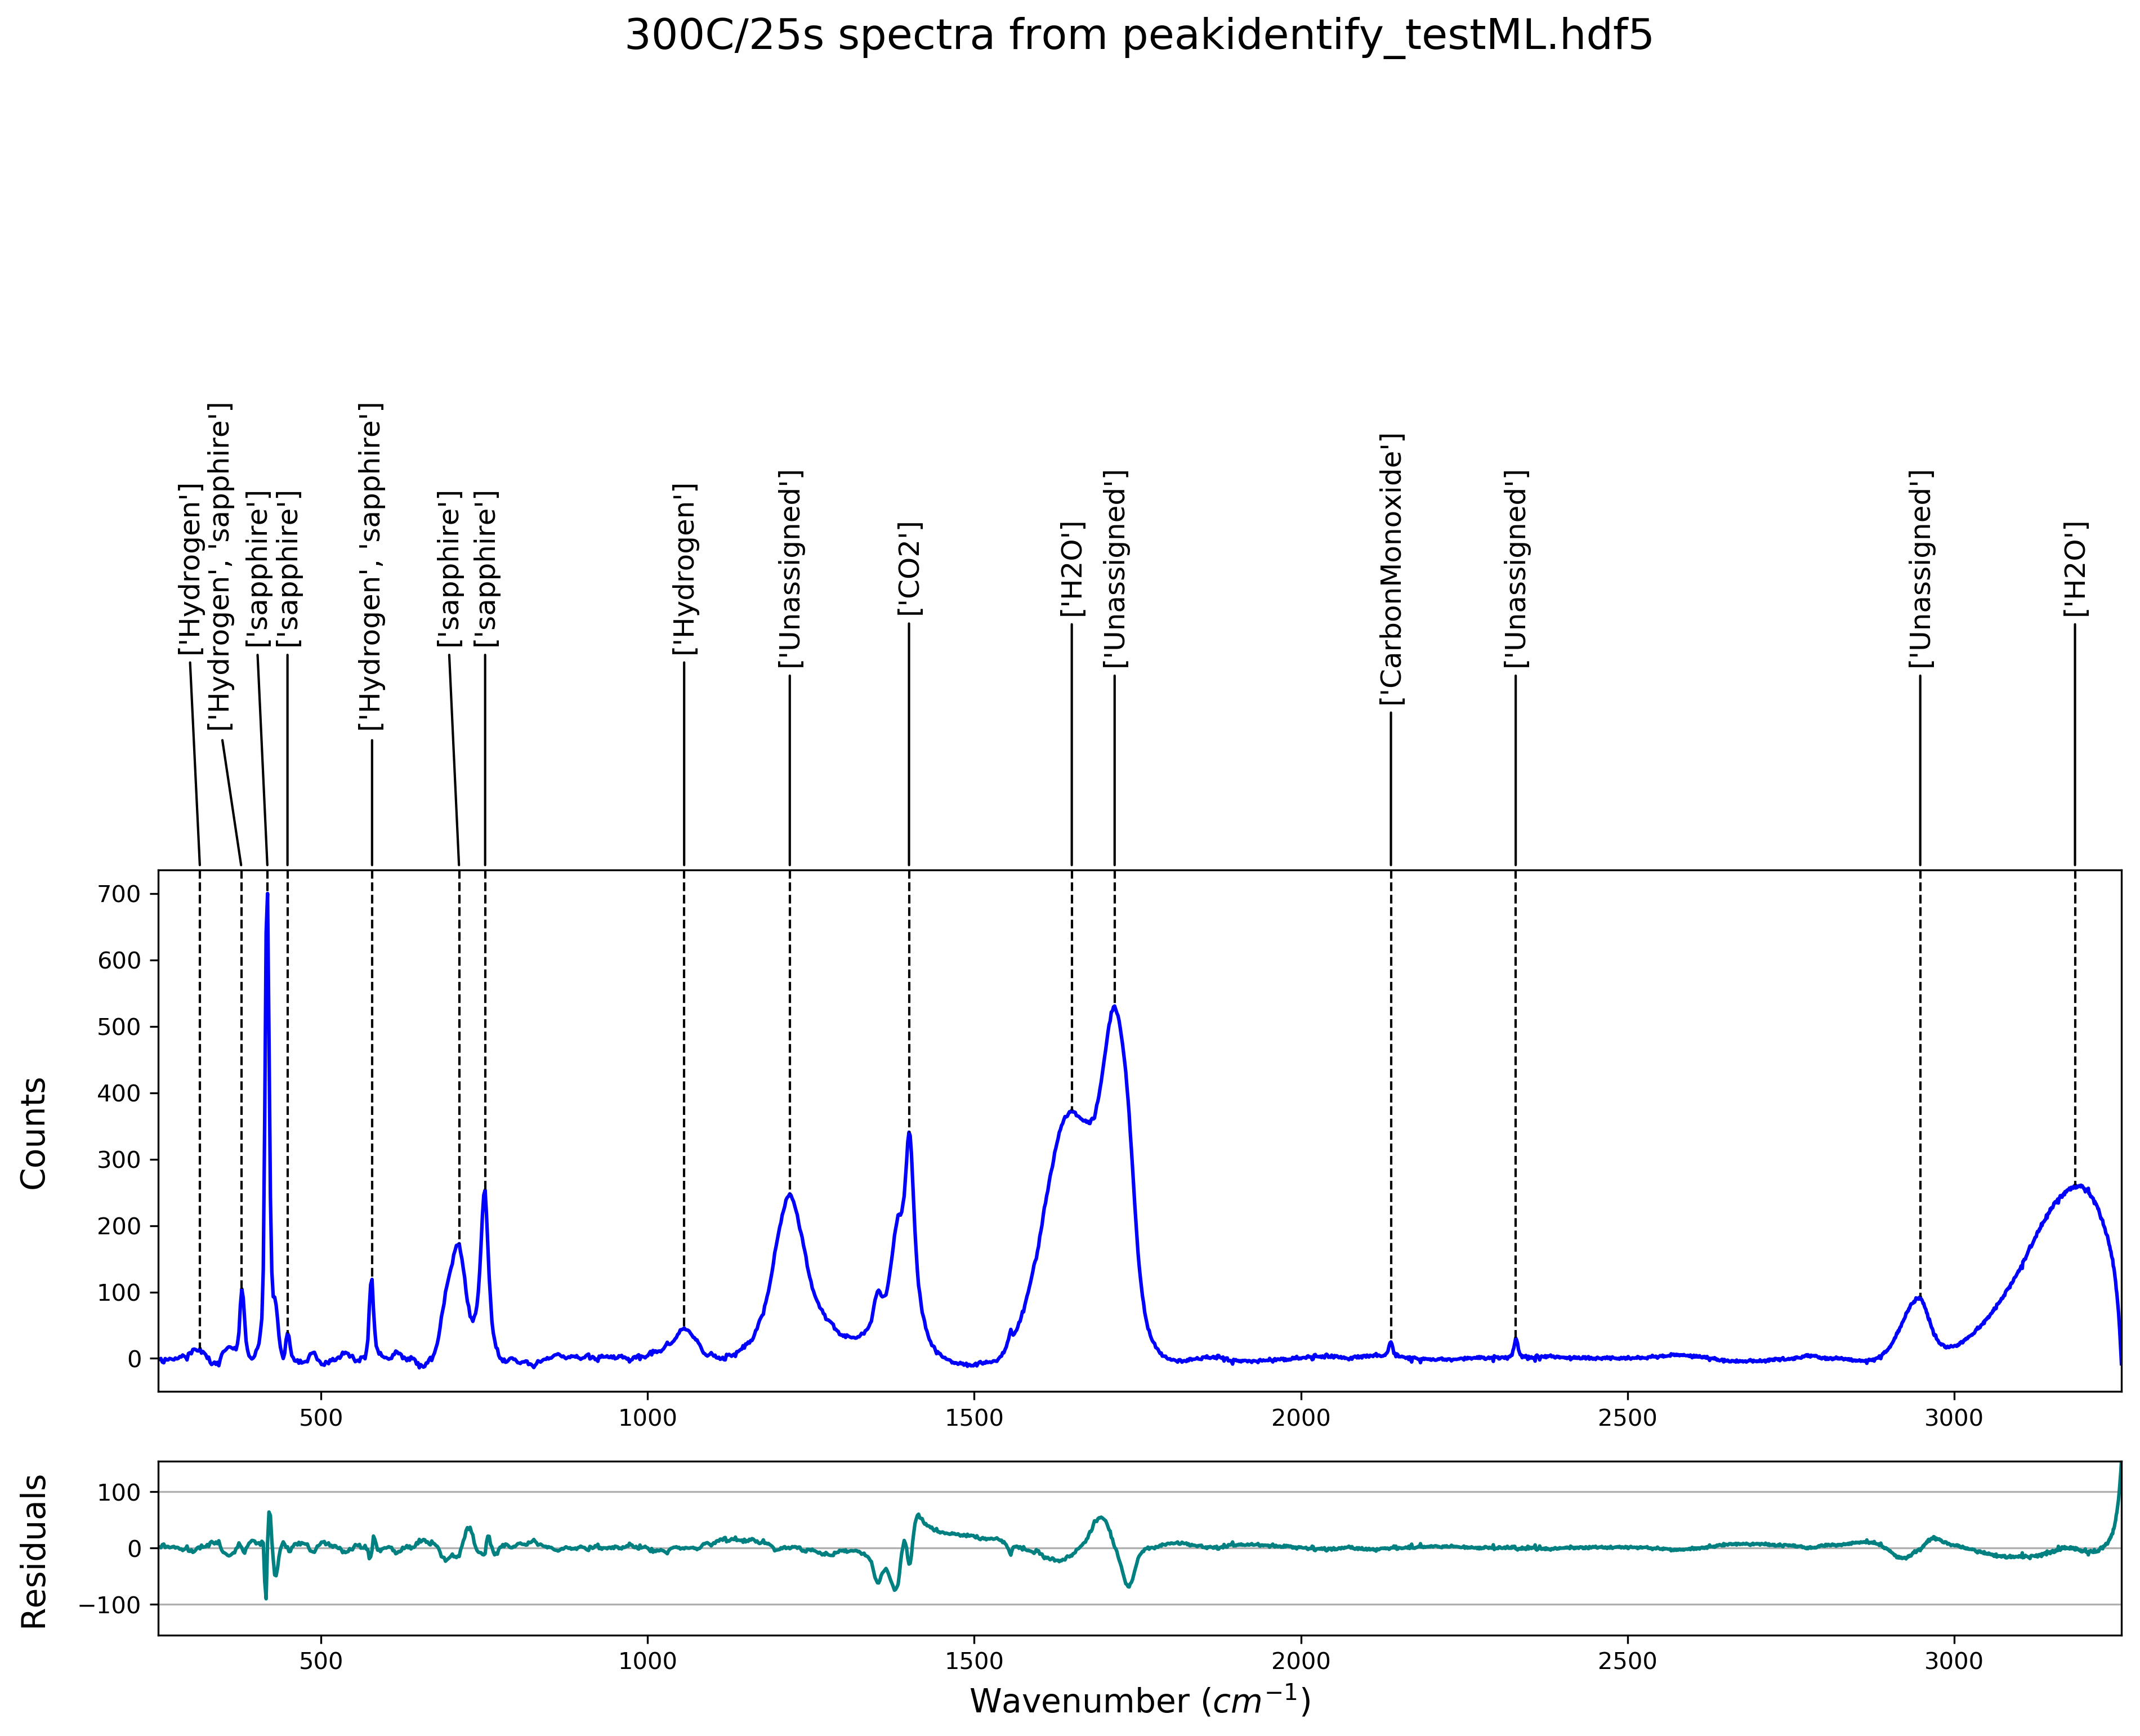

{'CO2': 50.0, 'CarbonMonoxide': 100.0, 'H2O': 100.0, 'Hydrogen': 100.0, 'sapphire': 150.0}


In [7]:
hdf5_calfilename = 'peakidentify_calibration_testML.hdf5'
key = 'CarbonMonoxide'
key2 = 'Hydrogen'
key3 = 'CO2'
key4 = 'sapphire'
key5 = 'H2O'
hdf5_expfilename = 'peakidentify_testML.hdf5'
expkey = '300C/25s'
temp = 300
time = 25
# open .hdf5
calhdf5 = h5py.File(hdf5_calfilename, 'r+')
exphdf5 = h5py.File(hdf5_expfilename, 'r+')
# extract spectra data
known_x = list(calhdf5['{}/wavenumber'.format(key)])
known_y = list(calhdf5['{}/counts'.format(key)])
residuals = np.asarray(list(exphdf5['{}/{}/residuals'.format(str(temp)+'C', str(time)+'s')]))
unknown_x = list(exphdf5['{}/{}/wavenumber'.format(str(temp)+'C', str(time)+'s')])
unknown_y = list(exphdf5['{}/{}/counts'.format(str(temp)+'C', str(time)+'s')])
# extract fitted peak center values
co_peaks = []
H_peaks = []
CO2_peaks = []
sapphire_peaks = []
H2O_peaks = []
unknown_peakstest = []
for _,peak in enumerate(list(calhdf5[key])[:-3]):
    co_peaks.append(list(calhdf5['{}/{}'.format(key, peak)])[0][2])

for _,peak in enumerate(list(calhdf5[key2])[:-3]):
    H_peaks.append(list(calhdf5['{}/{}'.format(key2, peak)])[0][2])
for _,peak in enumerate(list(calhdf5[key3])[:-3]):
    CO2_peaks.append(list(calhdf5['{}/{}'.format(key3, peak)])[0][2])
for _,peak in enumerate(list(calhdf5[key4])[:-3]):
    sapphire_peaks.append(list(calhdf5['{}/{}'.format(key4, peak)])[0][2])
for _,peak in enumerate(list(calhdf5[key5])[:-3]):
    H2O_peaks.append(list(calhdf5['{}/{}'.format(key5, peak)])[0][2])
for i,peak in enumerate(list(exphdf5[expkey])[:-3]):
    if i < 9:
        unknown_peakstest.append(list(exphdf5['{}/{}/Peak_0{}'.format(str(temp)+'C', str(time)+'s', i+1)])[0][2])
    else:
        unknown_peakstest.append(list(exphdf5['{}/{}/Peak_{}'.format(str(temp)+'C', str(time)+'s', i+1)])[0][2])
known_x = np.asarray(known_x)
known_y = np.asarray(known_y)
unknown_x = np.asarray(unknown_x)
unknown_y = np.asarray(unknown_y)
known_compound_list = list(calhdf5.keys())
precision = 50
known_peaks_listtest = [co_peaks, CO2_peaks, H_peaks, H2O_peaks, sapphire_peaks]
known_peakstest = []
association_matrixtest = []
# for i, _ in enumerate(known_compound_list):
#     for _,peak in enumerate(list(hdf5[key])[:-3]):
#         known_peakstest.append(known_peaks_listtest[i])
#         #print(type(known_peaks))
#         association_matrixtest.append(compare_unknown_to_known(
#             unknown_peakstest, known_peakstest[i], precision,
#             hdf5_expfilename, expkey))

        
#OK, next identify all of the peaks present in the known compound set.
    #For efficiency, we'll also compare them against the unknown in the same for loop.
known_peaks = []
known_peaks_list = []
num_peaks_list = []
assignment_matrix = []
split__index_list = []
for i, _ in enumerate(known_compound_list):
    print("The peaks that we found for "
      + str(known_compound_list[i]) + " are: ")
    num_peaks_list.append(len(list(calhdf5[known_compound_list[i]])[:-3]))
    split__index_list.append(sum(num_peaks_list))
    for j,peak in enumerate(list(calhdf5[known_compound_list[i]])[:-3]):
        print(list(calhdf5['{}/{}'.format(known_compound_list[i], peak)])[0][2])
        # Need to separate known peaks to make a list of two separate lists
        # to perform custom list split using list comprehension + zip() and split_index_list
        known_peaks_list.append(list(calhdf5['{}/{}'.format(known_compound_list[i], peak)])[0][2])
        result = [known_peaks_list[i : j] for i, j in zip([0] + split__index_list, split__index_list + [None])] 
    known_peakstest.append(result)
    association_matrixtest.append(peakidentify.compare_unknown_to_known(
        unknown_peakstest, known_peakstest[i][i], precision))        
       

unknown_peak_assignmentstest = peakidentify.peak_position_comparisons(
    unknown_peakstest,
    known_peakstest,
    association_matrixtest,
    hdf5_calfilename)
peak_labels=[]
for i, _ in enumerate(unknown_peak_assignmentstest):  
        peak_labels.append(str(unknown_peak_assignmentstest[i]))
peakidentify.plotting_peak_assignments(unknown_x,
                                       unknown_y,
                                       unknown_peakstest,
                                       unknown_peak_assignmentstest,
                                       hdf5_expfilename,
                                       hdf5_calfilename, temp, time, peak_labels, exportlabelinput = False )
percentages = peakidentify.percentage_of_peaks_found(known_peakstest[len(known_compound_list)-1],
                                            association_matrixtest,
                                            hdf5_calfilename)
print(percentages)
calhdf5.close()
exphdf5.close()

In [8]:
def process_score(unknown_peaks,known_peaks,k, precision, unknownname, knownname):
    if k<len(known_peaks)+1:
        compdf=pd.DataFrame(data=peakidentify.score_sort(unknown_peaks,known_peaks,k, precision)[0][0][:],columns=[str(unknownname)+'_vs_'+str(knownname)+'_peak_Scores normalized over the #'+str(k) + ' highest score in the peak set'])
        compdf=compdf.assign(Peaks=peakidentify.score_sort(unknown_peaks,known_peaks,1, precision)[0][1][:])
    else:
        compdf=pd.DataFrame(data=peakidentify.score_sort(unknown_peaks,known_peaks,k, precision)[0][0][:],columns=[str(unknownname)+'_vs_'+str(knownname)+'_peak_Scores Unnormalized'])
        compdf=compdf.assign(Peaks=peakidentify.score_sort(unknown_peaks,known_peaks,1, precision)[0][1][:])
    return compdf

In [9]:
def score_table(unknown_peaks,known_peaks, precision,unknownname,knownname):
    k_range = range(1,len(known_peaks)+2)
    frames = [ process_score(unknown_peaks,known_peaks,k, precision,unknownname,knownname) for k in k_range ]
    result = pd.concat(frames,axis=1, join='outer', join_axes=None, ignore_index=False,
              keys=None, levels=None, names=None, verify_integrity=False,
              copy=True,sort=True)
    return result

In [10]:
precision = 50
score_table(unknown_peakstest,H_peaks, precision, 'Formic3.6wt%', 'H').T

Function did not receive a scoremax variable. The variable
        scoremax has been reset back to 1. This is equivalent to 
        your unnormalized score.


0  \
Formic3.6wt%_vs_H_peak_Scores normalized over t...                     0.244107   
Peaks                                               (314.77, 355.6504104104104)   
Formic3.6wt%_vs_H_peak_Scores normalized over t...                     0.507283   
Peaks                                               (314.77, 355.6504104104104)   
Formic3.6wt%_vs_H_peak_Scores normalized over t...                     0.574483   
Peaks                                               (314.77, 355.6504104104104)   
Formic3.6wt%_vs_H_peak_Scores normalized over t...                            1   
Peaks                                               (314.77, 355.6504104104104)   
Formic3.6wt%_vs_H_peak_Scores Unnormalized                            0.0238775   
Peaks                                               (314.77, 355.6504104104104)   

                                                                              1  \
Formic3.6wt%_vs_H_peak_Scores normalized over t...                     0.424916   
Peaks                                               (378.71, 355.6504104104104)   
Formic3.6wt%_vs_H_peak_Scores normalized over t...                     0.883025   
Peaks                                               (378.71, 355.6504104104104)   
Formic3.6wt%_vs_H_peak_Scores normalized over t...                            1   
Peaks                                               (378.71, 355.6504104104104)   
Formic3.6wt%_vs_H_peak_Scores normalized over t...                       1.7407   
Peaks                                               (378.71, 355.6504104104104)   
Formic3.6wt%_vs_H_peak_Scores Unnormalized                            0.0415635   
Peaks                                               (378.71, 355.6504104104104)   

                                                                              2  \
Formic3.6wt%_vs_H_peak_Scores normalized over t...                            1   
Peaks                                               (578.11, 587.3333133133133)   
Formic3.6wt%_vs_H_peak_Scores normalized over t...                      2.07812   
Peaks                                               (578.11, 587.3333133133133)   
Formic3.6wt%_vs_H_peak_Scores normalized over t...                       2.3534   
Peaks                                               (578.11, 587.3333133133133)   
Formic3.6wt%_vs_H_peak_Scores normalized over t...                      4.09656   
Peaks                                               (578.11, 587.3333133133133)   
Formic3.6wt%_vs_H_peak_Scores Unnormalized                            0.0978156   
Peaks                                               (578.11, 587.3333133133133)   

                                                                               3  
Formic3.6wt%_vs_H_peak_Scores normalized over t...                      0.481205  
Peaks                                               (1055.9, 1035.6547747747748)  
Formic3.6wt%_vs_H_peak_Scores normalized over t...                             1  
Peaks                                               (1055.9, 1035.6547747747748)  
Formic3.6wt%_vs_H_peak_Scores normalized over t...                       1.13247  
Peaks                                               (1055.9, 1035.6547747747748)  
Formic3.6wt%_vs_H_peak_Scores normalized over t...                       1.97129  
Peaks                                               (1055.9, 1035.6547747747748)  
Formic3.6wt%_vs_H_peak_Scores Unnormalized                             0.0470694  
Peaks                                               (1055.9, 1035.6547747747748)

In [11]:
"""This function takes in compounds from a dictionary from shoyu, and, using spectrafit,
identifies peaks found in both the fed-in known spectra, as well as the unknown spectra
to be analyzed. From that identification, it then classifies the peaks in the unknown
spectra based on the fed-in known spectra.
 """
import math
import h5py
import numpy as np
import matplotlib.pyplot as plt
import lineid_plot


# Will probably need to create an additional function

def peak_assignment(unknownhdf5_filename, temp, time, knownhdf5_filename,
                    precision=50, exportlabelinput=True, plot=True):
    """This function is a wrapper function from which all classification
    of peaks occurs."""

    #Handling errors in inputs.
    if not isinstance(knownhdf5_filename, str):
        raise TypeError("""Passed value of `knownhdf5_filename` is not a string!
        Instead, it is: """ + str(type(knownhdf5_filename)))
    if not knownhdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError("""`knownhdf5_filename` is not type = .hdf5!
        Instead, it is: """ + knownhdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(unknownhdf5_filename, str):
        raise TypeError("""Passed value of `unknownhdf5_filename` is not a string!
        Instead, it is: """ + str(type(unknownhdf5_filename)))
    if not unknownhdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError("""`unknownhdf5_filename` is not type = .hdf5!
        Instead, it is: """ + unknownhdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(temp, int):
        raise TypeError("""Passed value of `temp` is not a int!
        Instead, it is: """ + str(type(temp)))
    if not isinstance(time, int):
        raise TypeError("""Passed value of `time` is not a int!
        Instead, it is: """ + str(type(time)))

    if not isinstance(precision, (float, int)):
        raise TypeError("""Passed value of `precision` is not a float or int!
        Instead, it is: """ + str(type(precision)))
    if not isinstance(exportlabelinput, bool):
        raise TypeError("""Passed value of `exportlabelinput` is not a Boolean!
        Instead, it is: """ + str(type(exportlabelinput)))
    if not isinstance(plot, bool):
        raise TypeError("""Passed value of `plot` is not a Boolean!
        Instead, it is: """ + str(type(plot)))
    # open .hdf5
    unhdf5 = h5py.File(unknownhdf5_filename, 'r+')
    knhdf5 = h5py.File(knownhdf5_filename, 'r+')

    #Extract keys from files
    known_compound_list = list(knhdf5.keys())

    if not isinstance(known_compound_list, list):
        raise TypeError("""Passed value of `known_compound_list` is not a list!
        Instead, it is: """ + str(type(known_compound_list)))
    #Now we need to check the elements within the known_compound_list
    #to make sure they are correct.
    for i, _ in enumerate(known_compound_list):
        if not isinstance(known_compound_list[i], str):
            raise TypeError("""Passed value within `known_compound_list` is not
            a string! Instead, it is: """ + str(type(known_compound_list[i])))

    # extract spectra data
    unknown_x = list(unhdf5['{}C/{}s/wavenumber'.format(temp, time)])
    unknown_y = list(unhdf5['{}C/{}s/counts'.format(temp, time)])
    unknown_x = np.asarray(unknown_x)
    unknown_y = np.asarray(unknown_y)
    #Lets identify the peaks in the unknown spectrum.
    unknown_peaks = []
    for i, peak in enumerate(list(unhdf5['{}C/{}s'.format(temp, time)])[:-3]):
        try:
            if i < 9:
                unknown_peaks.append(list(unhdf5['{}C/{}s/Peak_0{}*'.format(temp,
                                                                            time,
                                                                            i+1)])[0][2])
            else:
                unknown_peaks.append(list(unhdf5['{}C/{}s/Peak_{}*'.format(temp,
                                                                           time,
                                                                           i+1)])[0][2])
        except Exception as e:
            #Normal peakassignment
            print("""Function did not receive adjusted peak.
            The function continued to look for an normal peak.""")
            if i < 9:
                print(peak)
                unknown_peaks.append(list(unhdf5['{}C/{}s/Peak_0{}'.format(temp,
                                                                           time,
                                                                           i+1)])[0][2])
            else:
                unknown_peaks.append(list(unhdf5['{}C/{}s/Peak_{}'.format(temp,
                                                                          time,
                                                                          i+1)])[0][2])
            print('Peak_{}*'.format(i+1))
        else:
            pass


    #OK, next identify all of the peaks present in the known compound set.
    #For efficiency, we'll also compare them against the unknown in the same for loop.
    known_peaks = []
    known_peaks_list = []
    num_peaks_list = []
    assignment_matrix = []
    split__index_list = []
    for i, _ in enumerate(known_compound_list):
        print("The peaks that we found for "
              + str(known_compound_list[i]) + " are: ")
        num_peaks_list.append(len(list(knhdf5[known_compound_list[i]])[:-3]))
        split__index_list.append(sum(num_peaks_list))
        for j, peak in enumerate(list(knhdf5[known_compound_list[i]])[:-3]):
            print(list(knhdf5['{}/{}'.format(known_compound_list[i], peak)])[0][2])
            # Need to separate known peaks to make a list of two separate lists
            # to perform custom list split using list comprehension + zip() and split_index_list
            known_peaks_list.append(list(knhdf5['{}/{}'.format(known_compound_list[i],
                                                               peak)])[0][2])
            result = [known_peaks_list[i : j] for i, j in zip([0] + split__index_list,
                                                              split__index_list +
                                                              [None])]
        known_peaks.append(result)
        assignment_matrix.append(compare_unknown_to_known(
            unknown_peaks, known_peaks[i][i], precision))
    #Ok, so that generates a full association matrix that contains everything
    #we need to assign peaks.
    #Now, let's go through and actually assign text to peaks.
    unknown_peak_assignments = peak_position_comparisons(unknown_peaks,
                                                         known_peaks,
                                                         assignment_matrix,
                                                         knownhdf5_filename)
    print(unknown_peak_assignments)
    peak_labels = []
    for i, _ in enumerate(unknown_peak_assignments):
        peak_labels.append(str(unknown_peak_assignments[i]))
    frames = []
    for j, peak in enumerate(list(unhdf5['{}C/{}s'.format(temp, time)])[:-3]):
        frames.append(pd.DataFrame(add_label(unknownhdf5_filename, temp, time, peak, peak_labels[j])))
         
    df = pd.concat(frames,axis=1, join='outer', join_axes=None, ignore_index=False,
              keys=None, levels=None, names=None, verify_integrity=False,
              copy=True,sort=True)
    df =df.T
    if plot:
        plotting_peak_assignments(unknown_x,
                                  unknown_y,
                                  unknown_peaks,
                                  unknown_peak_assignments,
                                  unknownhdf5_filename,
                                  knownhdf5_filename,
                                  temp,
                                  time,
                                  peak_labels,
                                  exportlabelinput)

    percentages = percentage_of_peaks_found(known_peaks[len(known_compound_list)-1],
                                            assignment_matrix,
                                            knownhdf5_filename)
    print(percentages)
    knhdf5.close()
    unhdf5.close()
    return unknown_x, unknown_y, unknown_peaks, unknown_peak_assignments, percentages, df

def compare_unknown_to_known(unknown_peaks, known_peaks, precision):
    """This function takes in peak positions for the spectrum to be
    analyzed and a single known compound and determines if the peaks
    found in the known compound are present in the unknown spectrum."""

    #Handling errors in inputs.
    if not isinstance(unknown_peaks, list):
        raise TypeError("""Passed value of `combined_peaks` is not a list!
        Instead, it is: """ + str(type(unknown_peaks)))

    if not isinstance(known_peaks, list):
        raise TypeError("""Passed value of `known_peaks` is not a list!
        Instead, it is: """ + str(type(known_peaks)))
# Need to check values within known_peaks

    if not isinstance(precision, (float, int)):
        raise TypeError("""Passed value of `precision` is not a float or int!
        Instead, it is: """ + str(type(precision)))

    assignment_matrix = np.zeros(len(unknown_peaks))
    peaks_found = 0
    for i, _ in enumerate(unknown_peaks):
        for j, _ in enumerate(known_peaks):
            # instead of If, call peak_1D_score
            if math.isclose(unknown_peaks[i], known_peaks[j],
                            abs_tol=precision, rel_tol=1e-9):
                # Instead of using a 1, just input the score
                # from the score calculator.
                # Bigger is better.
                # Storing only the second component in the list.
                assignment_matrix[i] = 1
                peaks_found += 1
                continue
            else:
                pass
        if peaks_found == len(known_peaks):
            continue
        else:
            pass
    print(assignment_matrix)

    return assignment_matrix

def peak_position_comparisons(unknown_peaks, known_compound_peaks,
                              association_matrix,
                              knownhdf5_filename):
    """This function takes in an association matrix and turns the numbers
    given by said matrix into a text label."""

    #Handling errors in inputs.
    if not isinstance(unknown_peaks, list):
        raise TypeError("""Passed value of `unknown_peaks` is not a list!
        Instead, it is: """ + str(type(unknown_peaks)))
    if not isinstance(known_compound_peaks, list):
        raise TypeError("""Passed value of `known_compound_peaks` is not a list!
        Instead, it is: """ + str(type(known_compound_peaks)))
    if not isinstance(knownhdf5_filename, str):
        raise TypeError("""Passed value of `knownhdf5_filename` is not a string!
        Instead, it is: """+ str(type(knownhdf5_filename)))
    if not knownhdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError("""`knownhdf5_filename` is not type = .hdf5!
        Instead, it is: """+ knownhdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(association_matrix, list):
        raise TypeError("""Passed value of `association_matrix` is not a float
        or int! Instead, it is: """ + str(type(association_matrix)))

    # open .hdf5
    knhdf5 = h5py.File(knownhdf5_filename, 'r+')

    #Extract keys from files
    known_compound_list = list(knhdf5.keys())

    if not isinstance(known_compound_list, list):
        raise TypeError("""Passed value of `known_compound_list` is not a list!
        Instead, it is: """+ str(type(known_compound_list)))
    # Now we need to check the elements within the known_compound_list
    # to make sure they are correct.
    for i, _ in enumerate(known_compound_list):
        if not isinstance(known_compound_list[i], str):
            raise TypeError("""Passed value within `known_compound_list` is
            not a string! Instead, it is: """ + str(type(known_compound_list[i])))

    unknown_peak_assignment = []
    #Step through the unknown peaks to make an assignment for each unknown peak.

    for i, _ in enumerate(unknown_peaks):
        # We might be able to make a small performance
        # improvement if we were to somehow
        # not search the peaks we already had searched
        # but that seems to not be trivial.
        position_assignment = []
        # We'll need an outer loop that walks through
        # all the different compound positions
        for j, _ in enumerate(known_compound_peaks):
            if association_matrix[j][i] == 1:
                position_assignment.append(known_compound_list[j])
            else:
                pass
        if position_assignment == []:
            position_assignment.append("Unassigned")
        else:
            pass
        unknown_peak_assignment.append(position_assignment)
    knhdf5.close()
    return unknown_peak_assignment


def percentage_of_peaks_found(known_peaks, association_matrix, knownhdf5_filename):
    """This function takes in a list of classified peaks, and returns a percentage of
    how many of the material's peaks are found in the unknown spectrum.
    This can be used as a metric of confidence."""

    #Handle bad inputs
    if not isinstance(known_peaks, list):
        raise TypeError("""Passed value of `known_peaks` is not a list!
        Instead, it is: """ + str(type(known_peaks)))
    if not isinstance(association_matrix, list):
        raise TypeError("""Passed value of `association_matrix` is not a float or int!
        Instead, it is: """ + str(type(association_matrix)))
    if not isinstance(knownhdf5_filename, str):
        raise TypeError("""Passed value of `knownhdf5_filename` is not a string!
        Instead, it is: """+ str(type(knownhdf5_filename)))
    if not knownhdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError("""`knownhdf5_filename` is not type = .hdf5!
        Instead, it is: """ + knownhdf5_filename.split('/')[-1].split('.')[-1])

    # open .hdf5
    knhdf5 = h5py.File(knownhdf5_filename, 'r+')

    # Extract keys from files
    known_compound_list = list(knhdf5.keys())

    if not isinstance(known_compound_list, list):
        raise TypeError("""Passed value of `known_compound_list` is not a list!
        Instead, it is: """+ str(type(known_compound_list)))
    # Now we need to check the elements within the known_compound_list
    # to make sure they are correct.
    for i, _ in enumerate(known_compound_list):
        if not isinstance(known_compound_list[i], str):
            raise TypeError("""Passed value within `known_compound_list`
            is not a string!
            Instead, it is: """ + str(type(known_compound_list[i])))
    percentage_dict = {}
    for j, _ in enumerate(known_compound_list):
#         print(association_matrix)
#         print(known_peaks)
        count_number = sum(association_matrix[j])
        percentage_dict[known_compound_list[j]] = float(count_number /
                                                        (len(known_peaks[j]))) * 100
    knhdf5.close()
    return percentage_dict


def plotting_peak_assignments(unknown_x, unknown_y, unknown_peaks,
                              unknown_peak_assignments, unknownhdf5_filename,
                              knownhdf5_filename,
                              temp, time, peak_labels, exportlabelinput=True):
    """This function plots a set of unknown peaks, and plots the assigned
    classification given by the functions within peakassignment"""

    #Handling errors in inputs.
    if not isinstance(unknown_peaks, list):
        raise TypeError("""Passed value of `unknown_peaks` is not a list!
        Instead, it is: """ + str(type(unknown_peaks)))

    if not isinstance(unknown_x, (list, np.ndarray)):
        raise TypeError("""Passed value of `unknown_x` is not a list or ndarray!
        Instead, it is: """ + str(type(unknown_x)))

    if not isinstance(unknown_y, (list, np.ndarray)):
        raise TypeError(""" Passed value of `unknown_y` is not a list or ndarray!
        Instead, it is: """ + str(type(unknown_y)))
    # handling input errors
    if not isinstance(unknownhdf5_filename, str):
        raise TypeError("""Passed value of `unknownhdf5_filename` is not a string!
        Instead, it is: """ + str(type(unknownhdf5_filename)))
    if not unknownhdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError("""`unknownhdf5_filename` is not type = .hdf5!
        Instead, it is: """ + unknownhdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(knownhdf5_filename, str):
        raise TypeError("""Passed value of `knownhdf5_filename` is not a string!
        Instead, it is: """ + str(type(knownhdf5_filename)))
    if not knownhdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError("""`knownhdf5_filename` is not type = .hdf5!
        Instead, it is: """ + knownhdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(temp, int):
        raise TypeError("""Passed value of `temp` is not a int!
        Instead, it is: """ + str(type(temp)))
    if not isinstance(time, int):
        raise TypeError("""Passed value of `time` is not a int!
        Instead, it is: """ + str(type(time)))
    if not isinstance(peak_labels, list):
        raise TypeError("""Passed value of `peak_labels` is not a list!
        Instead, it is: """ + str(type(peak_labels)))
    # Now we need to check the elements within the known_compound_list
    # to make sure they are correct.
    for i, _ in enumerate(peak_labels):
        if not isinstance(peak_labels[i], str):
            raise TypeError("""Passed value within `peak_labels` is not a string!
            Instead, it is: """ + str(type(peak_labels[i])))
    #Now we need to check the elements within the unknown_peak_assignment
    #to make sure they are correct.
    for i, _ in enumerate(unknown_peak_assignments):
        if not isinstance(unknown_peak_assignments[i], list):
            raise TypeError("""Passed value within `unknown_peak_assignment`
            is not a list!
            Instead, it is: """ + str(type(unknown_peak_assignments[i])))
            if not isinstance(unknown_peak_assignments[i][i], str):
                raise TypeError("""Passed value within `unknown_peak_assignment`
                is not a string! 
                Instead, it is: """ + str(type(unknown_peak_assignments[i][i])))
    # open .hdf5
    knhdf5 = h5py.File(knownhdf5_filename, 'r')
    unhdf5 = h5py.File(unknownhdf5_filename, 'r')
    residuals = np.asarray(list(unhdf5['{}C/{}s/residuals'.format(temp, time)]))
    #Extract keys from files
    known_compound_list = list(knhdf5.keys())

    if not isinstance(known_compound_list, list):
        raise TypeError("""Passed value of `known_compound_list` is not a list!
        Instead, it is: """ + str(type(known_compound_list)))
    # Now we need to check the elements within the known_compound_list
    # to make sure they are correct.
    for i, _ in enumerate(known_compound_list):
        if not isinstance(known_compound_list[i], str):
            raise TypeError("""Passed value within `known_compound_list` is
            not a string! Instead, it is: """ + str(type(known_compound_list[i])))
    # extract spectra data
    x_data = list(unhdf5['{}C/{}s/wavenumber'.format(temp, time)])
    y_data = list(unhdf5['{}C/{}s/counts'.format(temp, time)])
#     plt.plot(unknown_x, unknown_y, color='black', label='Unknown Spectrum')
    if exportlabelinput:
        print('export labelling only')
    else:
        peak_labels = []
        for i, _ in enumerate(unknown_peak_assignments):
            peak_labels.append(str(unknown_peak_assignments[i]))
    print(peak_labels)
    # plot spectra and peak labels
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                                   gridspec_kw={'height_ratios': [3, 1]},
                                   figsize=(15, 6), dpi=300)
    # plot data
    ax1.plot(x_data, y_data, color='blue')
    ax2.plot(x_data, residuals, color='teal')
    lineid_plot.plot_line_ids(x_data, y_data, unknown_peaks,
                              peak_labels, box_axes_space=0.30,
                              plot_kwargs={'linewidth':1},
                              max_iter=75, ax=ax1)
#     fig.set_size_inches(15,5)
    # lock the scale so that additional plots do not warp the labels
    ax1.set_autoscale_on(False)
    # Titles and labels
    ax2.set_xlabel('Wavenumber ($cm^{-1}$)', fontsize=14)
    ax1.set_xlim(min(x_data), max(x_data))
    ax1.set_ylabel('Counts', fontsize=14, labelpad=20)
    ax2.set_ylabel('Residuals', fontsize=14, labelpad=12)
    # scale residuals plot symmetrically about zero
    ylim = max(abs(min(residuals)), abs(max(residuals)))
    ax2.set_ylim(-ylim, ylim)
    # add grid lines to residual plot
    ax2.grid(which='major', axis='y', linestyle='-')
    # force tick labels for top plot
    ax1.tick_params(axis='both', which='both', labelsize=10, labelbottom=True)
    # add title
    ax1.set_title('{}C/{}s spectra from {}'.format(temp,
                                                   time,
                                                   unknownhdf5_filename),
                  fontsize=18, pad=350)
    plt.show()
    knhdf5.close()
    unhdf5.close()

def add_label(hdf5_filename, temp, time, peak, label):
    """Function that adds a label to a peak dataset in the hdf5 file
    """
    #Handling errors in inputs.
    if not isinstance(hdf5_filename, str):
        raise TypeError("""Passed value of `hdf5_filename` is not a string!
        Instead, it is: """ + str(type(hdf5_filename)))
    if not hdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError("""`hdf5_filename` is not type = .hdf5!
        Instead, it is: """ + hdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(temp, int):
        raise TypeError("""Passed value of `temp` is not a int!
        Instead, it is: """ + str(type(temp)))
    if not isinstance(time, int):
        raise TypeError("""Passed value of `time` is not a int!
        Instead, it is: """ + str(type(time)))
    if not isinstance(peak, str):
        raise TypeError("""Passed value of `peak` is not a string!
        Instead, it is: """ + str(type(peak)))
    if not isinstance(label, str):
        raise TypeError("""Passed value of `label` is not a string!
        Instead, it is: """ + str(type(label)))
    # open hdf5 file as read/write
    hdf5 = h5py.File(hdf5_filename, 'r+')
    # extract existing data from peak dataset
    peak_data = list(hdf5['{}C/{}s/{}'.format(temp, time, peak)])[0]
#     print(peak_data)
    # make a new tuple that contains the orginal data as well as the label
    label_tuple = (label,)
    data = tuple(peak_data) +label_tuple
    # delete the old dataset so the new one can be saved
    del hdf5['{}C/{}s/{}'.format(temp, time, peak)]
    # define a custom datatype that allows for a string as the the last tuple element
    my_datatype = np.dtype([('fraction', np.float),
                            ('center', np.float),
                            ('sigma', np.float),
                            ('amplitude', np.float),
                            ('fwhm', np.float),
                            ('height', np.float),
                            ('area under the curve', np.float),
                            ('label', h5py.special_dtype(vlen=str))])
    # recreate the old dataset in the hdf5 file
    dataset = hdf5.create_dataset('{}C/{}s/{}'.format(temp, time, peak),
                                  (1,), dtype=my_datatype)
    # apply custom dtype to data tuple
#     print(dataset)
    print(data)
#     print(my_datatype)
    data_array = np.array(data, dtype=my_datatype)
    # write new values to the blank dataset
    dataset[...] = data_array
#     print(dataset)
    hdf5.close()
    return data

def peak_1d_score(row_i, row_j, scoremax, precision):
    """
    Returns scores with respect to the repricoal of the
    calculated Euclidean distance between peaks
    #√((x1-x2)^2) in 1D
    #√((x1-x2)^2 + (y1-y2)^2) in 2D

    Parameters:
        row_i (list like):  input list
        row_j (list like): input list
        scoremax (float): Euclidean reciprocal score divided by max score;
        default is 1

    Returns:
        scores (list): Euclidean reciprocal scores
        peaks (tuple): peaks associated with scores
    """
    # Handling errors at the input
    if not isinstance(row_i, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_i` is not a list or ndarray!
        Instead, it is: """ + str(type(row_i)))
    if not isinstance(row_j, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_j` is not a list or ndarray!
        Instead, it is: """ + str(type(row_j)))
    if not isinstance(scoremax, (float, int)):
        raise TypeError("""Passed value of `scoremax` is not a float or int!
        Instead, it is: """ + str(type(scoremax)))
    if scoremax < 0:
        raise ValueError("""Passed value of `scoremax` is not within bounds!""")

    # Initializing the variables
    scores = []
    peaks = []

    for i, _ in enumerate(row_i):
        for j, _ in enumerate(row_j):
            # Calculating distances between peaks
            distance = np.where((row_i[i] - row_j[j] > precision), np.nan,
                                math.sqrt(sum([math.pow(row_i[i] - row_j[j], 2)])))
            # Score for peaks less than 50 units apart
            if 1 / (distance + 1) > (1/precision):
                # Dividing over the given max score
                scores.append(((1 / (distance + 1)) / scoremax))
                # Appends a tuple of the compared peaks
                peaks.append((row_i[i], row_j[j]))
            else:
                pass
    return scores, peaks


def score_max(row_i, row_j, k, precision):
    """
    Returns list of scores sorted with respect to the peaks
    related to its output max score

    Parameters:
        row_i (list like):  input list
        row_j (list like): input list
        k (int): input integer used to sort the scores / kth highest score

    Returns:
        maxscores (list): Euclidean reciprocal score divided by max score
        maxpeaks (tuple): peaks associated with max scores
    """

    # Handling errors at the input
    if not isinstance(row_i, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_i` is not a list or ndarray!
        Instead, it is: """ + str(type(row_i)))
    if not isinstance(row_j, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_j` is not a list or ndarray!
        Instead, it is: """ + str(type(row_j)))
    if not isinstance(k, int):
        raise TypeError("""Passed value of `k` is not an int!
        Instead, it is: """ + str(type(k)))
    if k < 0:
        raise ValueError("""Passed value of `k` is not within bounds!""")
    try:
        scoremax = sorted(set(peak_1d_score(row_i, row_j, 1, precision)[0][:]))[-k]
        maxscores, maxpeaks = peak_1d_score(row_i, row_j, scoremax, precision)

    except Exception as e:
        print("""Function did not receive a scoremax variable. The variable
        scoremax has been reset back to 1. This is equivalent to 
        your unnormalized score.""")

        maxscores, maxpeaks = peak_1d_score(row_i, row_j, 1, precision)

    return maxscores, maxpeaks


def score_sort(row_i, row_j, k, precision):
    """
    Returns list of scores sorted

    Parameters:
        list_input (list like):  input list
        row (list like): input list
        k (int): input integer used to sort the scores / kth highest score

    Returns:
        sortedscores (list): sorted Euclidean distances
    """
    # Handling errors at the input
    if not isinstance(row_i, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_i` is not a list or ndarray!
        Instead, it is: """ + str(type(row_i)))
    if not isinstance(row_j, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_j` is not a list or ndarray!
        Instead, it is: """ + str(type(row_j)))
    if not isinstance(k, int):
        raise TypeError("""Passed value of `k` is not an int!
        Instead, it is: """ + str(type(k)))
    if k < 0:
        raise ValueError("""Passed value of `k` is not within bounds!""")

    sortedscores = []
    sortedscores.append(score_max(row_i, row_j, k, precision))
    sortedscores.sort()

    return sortedscores


In [12]:
dataprep.new_hdf5('peakidentify_label_testdf')
dataprep.add_experiment('peakidentify_label_testdf.hdf5',
                        '../ramandecompy/tests/test_files/FA_3.6wt%_300C_25s.csv')

Data from ../ramandecompy/tests/test_files/FA_3.6wt%_300C_25s.csv fit with compound pseudo-Voigt model. Results saved to peakidentify_label_testdf.hdf5.


Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_01
Peak_1*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_02
Peak_2*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_03
Peak_3*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_04
Peak_4*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_05
Peak_5*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_06
Peak_6*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_07
Peak_7*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_08
Peak_8*
Function did not receive adjusted peak.
        

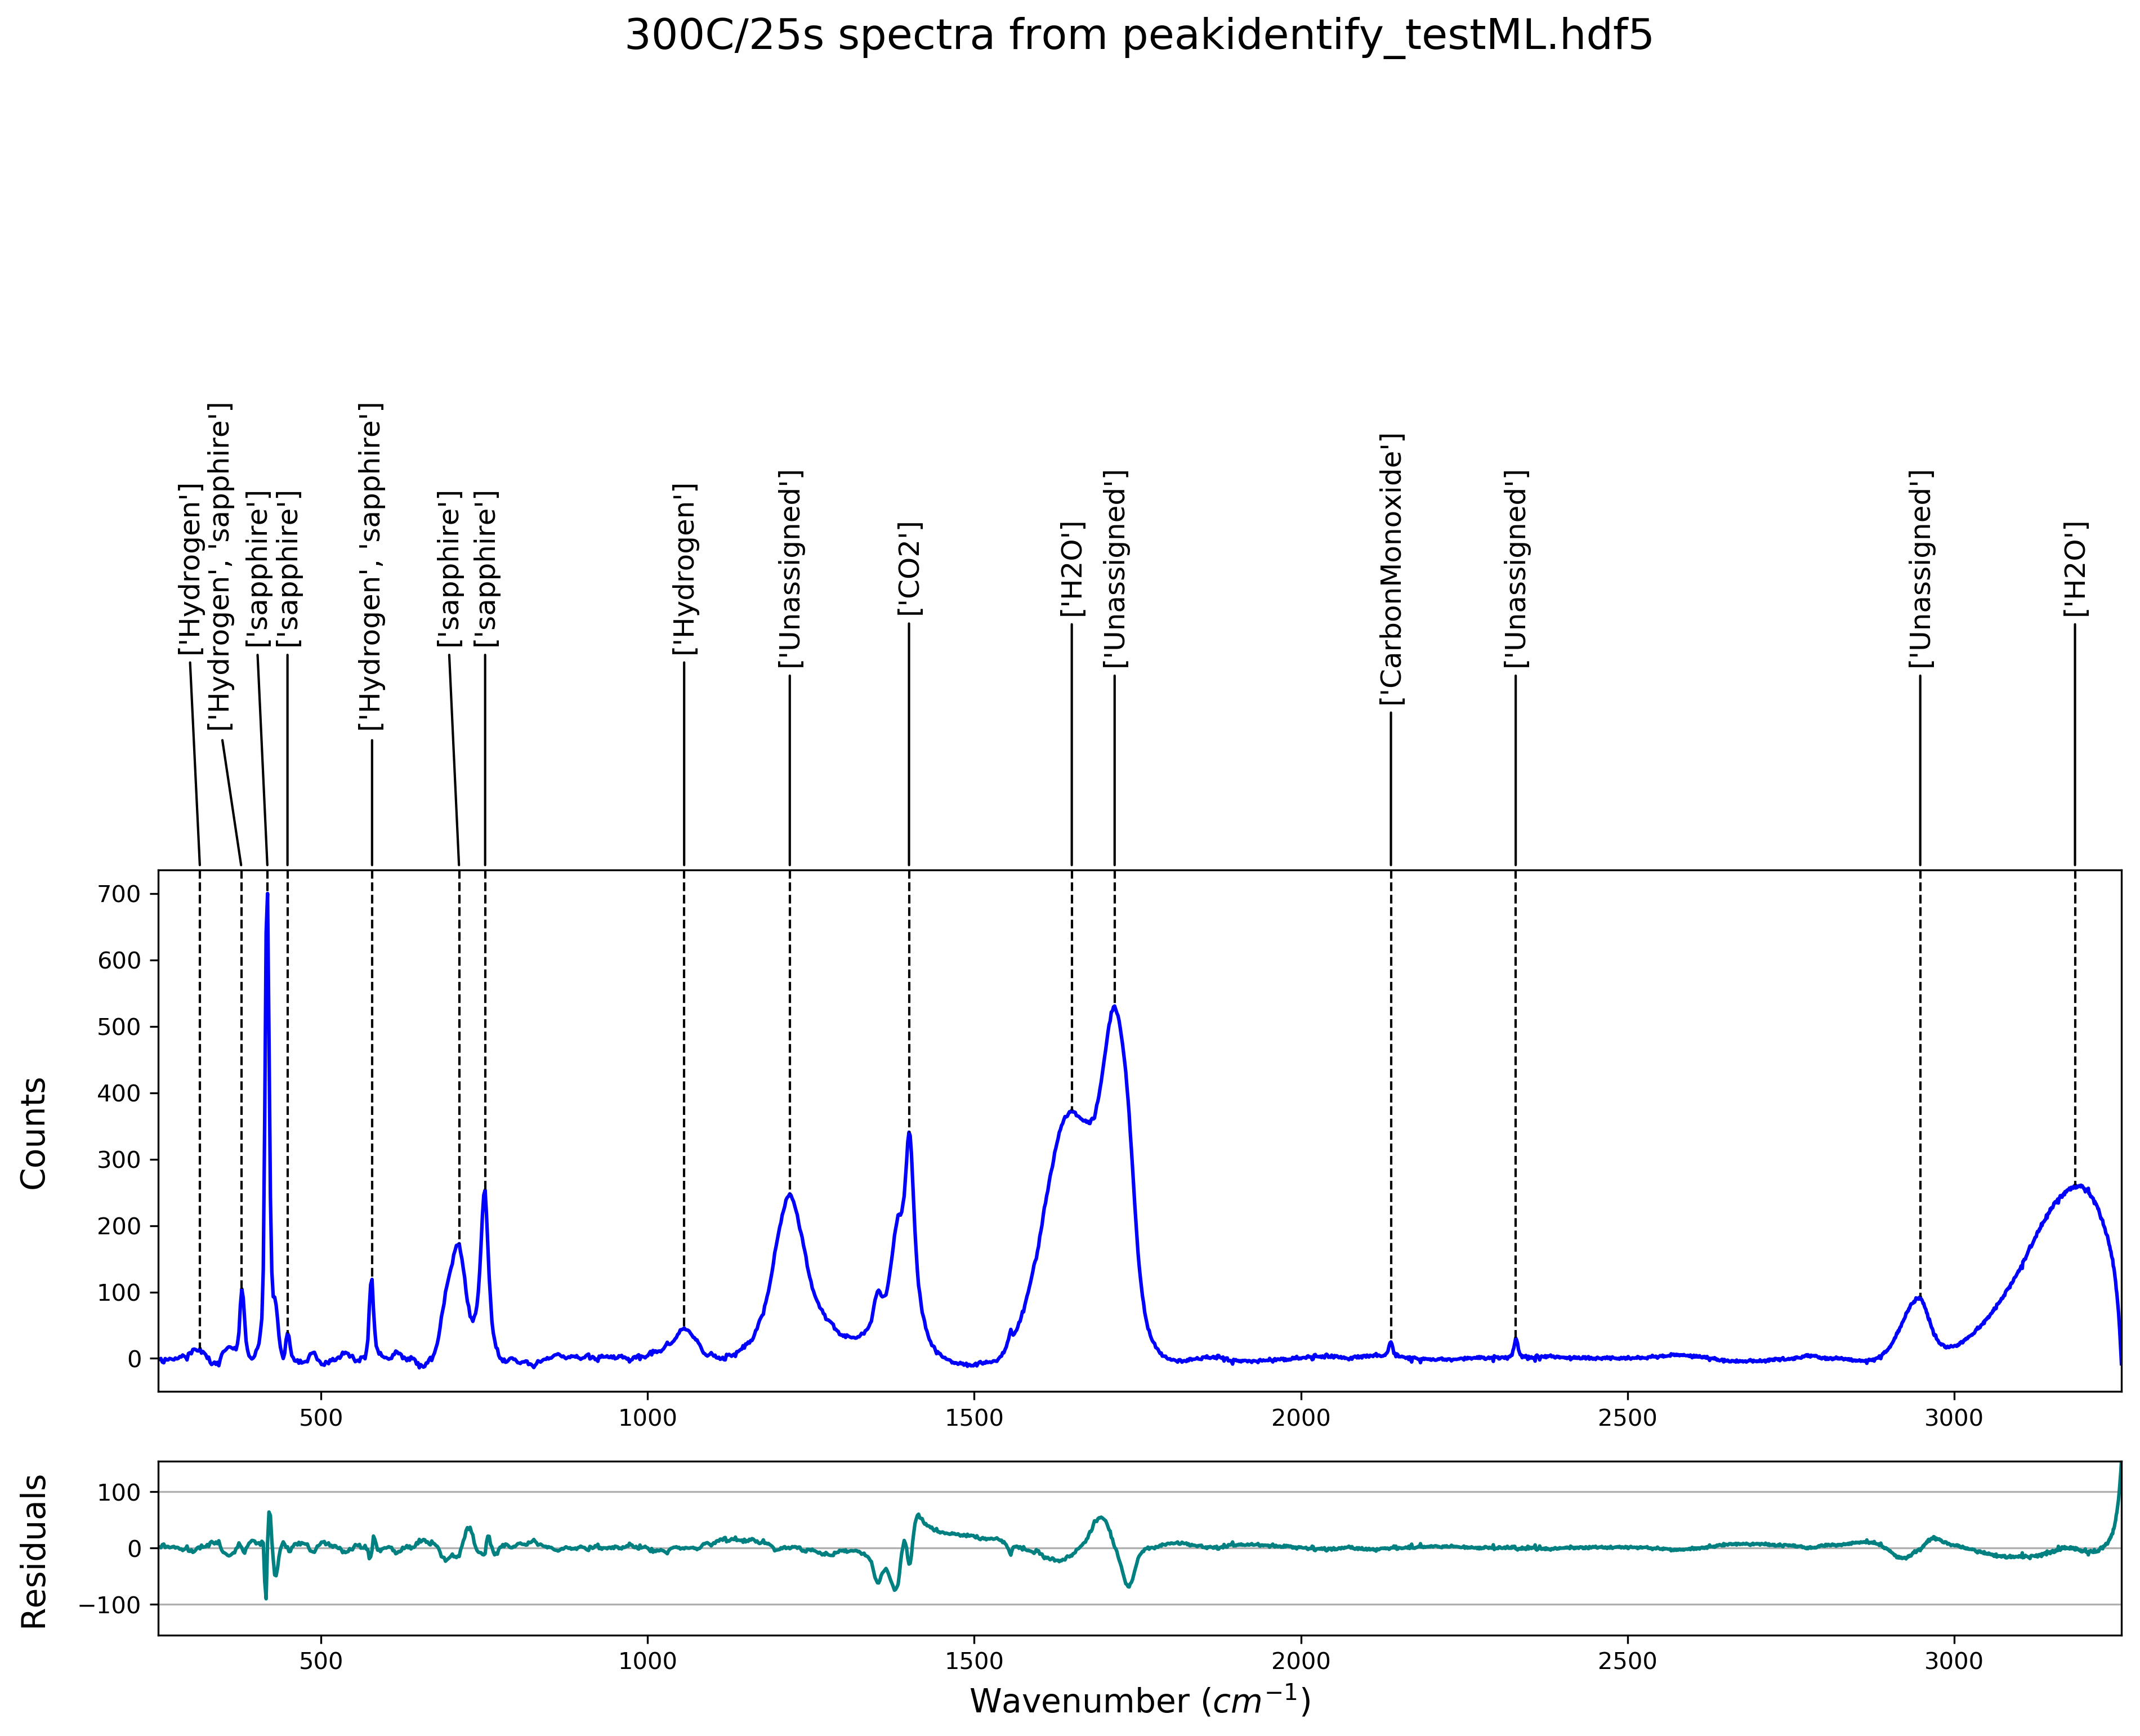

{'CO2': 50.0, 'CarbonMonoxide': 100.0, 'H2O': 100.0, 'Hydrogen': 100.0, 'sapphire': 150.0}


In [13]:
hdf5_calfilename = 'peakidentify_calibration_testML.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'peakidentify_testML.hdf5'
temp = 300
time = 25
unknown_x, unknown_y, unknown_peaks, unknown_peak_assignments, percentages, df = peak_assignment(hdf5_expfilename, temp, time, hdf5_calfilename, 50)

In [14]:
df

0        1       2        3        4        5        6  \
0  2.66632e-06  9.47784  314.77  251.853  18.9557  12.4817  251.852   
0     0.506813   4.0129  378.71  1034.01   8.0258   101.26  1028.59   
0     0.636782  3.84759  418.14  7306.16  7.69519  708.864  7270.35   
0  2.55231e-05  2.69962  448.67  193.734  5.39924  33.7084  193.741   
0     0.188666  4.21062  578.11  1090.47  8.42124   114.25  1089.49   
0  1.38778e-15  20.4979  711.51  6837.15  40.9957  156.677  6837.15   
0  6.88713e-07  7.19462  751.21  3533.44  14.3892  230.689  3533.44   
0            0  18.0052  1055.9  1438.24  36.0103  37.5207  1438.24   
0     0.841161  29.1589  1217.6  20781.3  58.3177  243.997  20534.1   
0            1  15.8466  1400.1  15275.1  31.6932  306.831  15166.6   
0  1.05175e-05  47.9173  1649.3  35138.2  95.8346  344.448  35138.2   
0     0.179058   26.217  1714.9  25828.1   52.434  436.042  25776.7   
0            1  3.77176  2137.9  285.944  7.54351  24.1317  285.521   
0     0.489606  3.60812  2328.9  255.955  7.21624  28.0624  255.753   
0  1.60982e-15  21.9786  2948.2  3553.09  43.9572  75.9353  3553.09   
0     0.553011  79.8096  3185.1  53203.1  159.619  257.309  41554.6   

                          7  
0              ['Hydrogen']  
0  ['Hydrogen', 'sapphire']  
0              ['sapphire']  
0              ['sapphire']  
0  ['Hydrogen', 'sapphire']  
0              ['sapphire']  
0              ['sapphire']  
0              ['Hydrogen']  
0            ['Unassigned']  
0                   ['CO2']  
0                   ['H2O']  
0            ['Unassigned']  
0        ['CarbonMonoxide']  
0            ['Unassigned']  
0            ['Unassigned']  
0                   ['H2O']

In [15]:
hdf5_filename = 'peakidentify_label_testdf.hdf5'
dataprep.add_experiment(hdf5_filename, '../ramandecompy/tests/test_files/FA_3.6wt%_300C_35s.csv')
dataprep.add_experiment(hdf5_filename, '../ramandecompy/tests/test_files/FA_3.6wt%_300C_45s.csv')
dataprep.add_experiment(hdf5_filename, '../ramandecompy/tests/test_files/FA_3.6wt%_300C_55s.csv')
dataprep.add_experiment(hdf5_filename, '../ramandecompy/tests/test_files/FA_3.6wt%_300C_65s.csv')

Data from ../ramandecompy/tests/test_files/FA_3.6wt%_300C_35s.csv fit with compound pseudo-Voigt model. Results saved to peakidentify_label_testdf.hdf5.
Data from ../ramandecompy/tests/test_files/FA_3.6wt%_300C_45s.csv fit with compound pseudo-Voigt model. Results saved to peakidentify_label_testdf.hdf5.
Data from ../ramandecompy/tests/test_files/FA_3.6wt%_300C_55s.csv fit with compound pseudo-Voigt model. Results saved to peakidentify_label_testdf.hdf5.
Data from ../ramandecompy/tests/test_files/FA_3.6wt%_300C_65s.csv fit with compound pseudo-Voigt model. Results saved to peakidentify_label_testdf.hdf5.


Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_01
Peak_1*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_02
Peak_2*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_03
Peak_3*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_04
Peak_4*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_05
Peak_5*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_06
Peak_6*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_07
Peak_7*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_08
Peak_8*
Function did not receive adjusted peak.
        

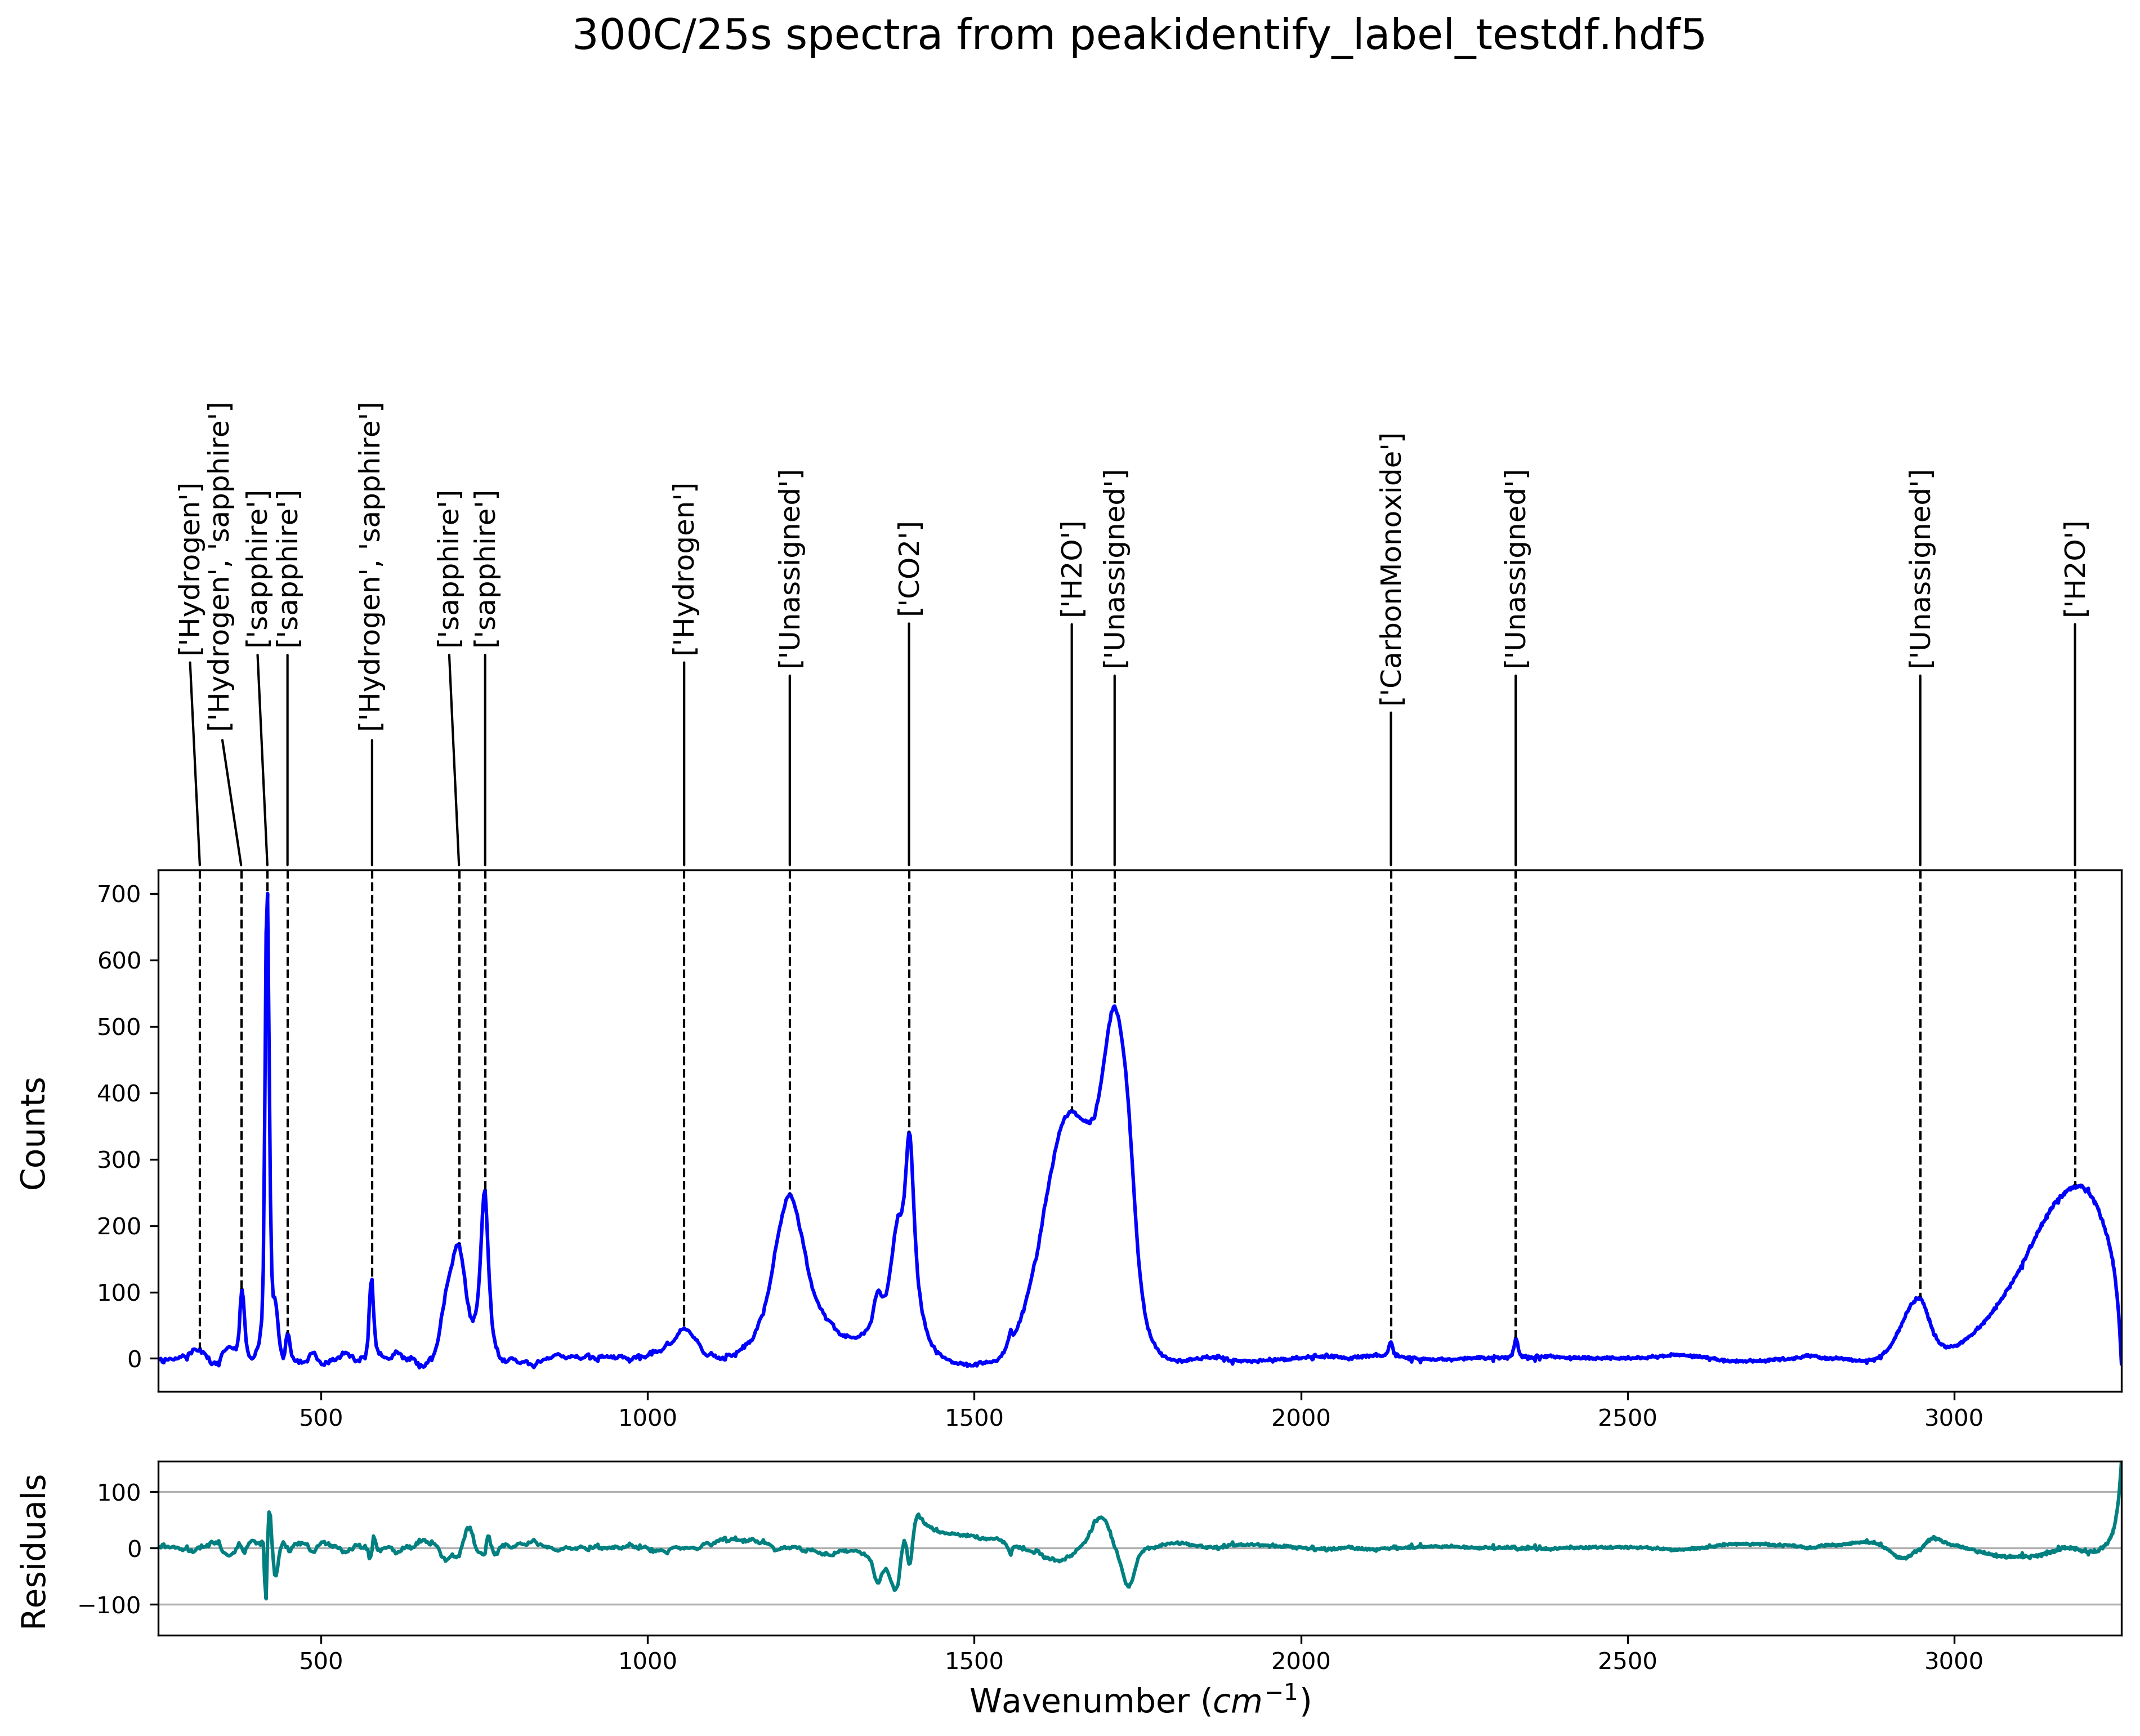

{'CO2': 50.0, 'CarbonMonoxide': 100.0, 'H2O': 100.0, 'Hydrogen': 100.0, 'sapphire': 150.0}


In [16]:
hdf5_calfilename = 'peakidentify_calibration_testML.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'peakidentify_label_testdf.hdf5'
temp = 300
time = 25
unknown_x, unknown_y, unknown_peaks, unknown_peak_assignments, percentages, df1 = peak_assignment(hdf5_expfilename, temp, time, hdf5_calfilename, 50)

In [17]:
df1

0        1       2        3        4        5        6  \
0  2.66632e-06  9.47784  314.77  251.853  18.9557  12.4817  251.852   
0     0.506813   4.0129  378.71  1034.01   8.0258   101.26  1028.59   
0     0.636782  3.84759  418.14  7306.16  7.69519  708.864  7270.35   
0  2.55231e-05  2.69962  448.67  193.734  5.39924  33.7084  193.741   
0     0.188666  4.21062  578.11  1090.47  8.42124   114.25  1089.49   
0  1.38778e-15  20.4979  711.51  6837.15  40.9957  156.677  6837.15   
0  6.88713e-07  7.19462  751.21  3533.44  14.3892  230.689  3533.44   
0            0  18.0052  1055.9  1438.24  36.0103  37.5207  1438.24   
0     0.841161  29.1589  1217.6  20781.3  58.3177  243.997  20534.1   
0            1  15.8466  1400.1  15275.1  31.6932  306.831  15166.6   
0  1.05175e-05  47.9173  1649.3  35138.2  95.8346  344.448  35138.2   
0     0.179058   26.217  1714.9  25828.1   52.434  436.042  25776.7   
0            1  3.77176  2137.9  285.944  7.54351  24.1317  285.521   
0     0.489606  3.60812  2328.9  255.955  7.21624  28.0624  255.753   
0  1.60982e-15  21.9786  2948.2  3553.09  43.9572  75.9353  3553.09   
0     0.553011  79.8096  3185.1  53203.1  159.619  257.309  41554.6   

                          7  
0              ['Hydrogen']  
0  ['Hydrogen', 'sapphire']  
0              ['sapphire']  
0              ['sapphire']  
0  ['Hydrogen', 'sapphire']  
0              ['sapphire']  
0              ['sapphire']  
0              ['Hydrogen']  
0            ['Unassigned']  
0                   ['CO2']  
0                   ['H2O']  
0            ['Unassigned']  
0        ['CarbonMonoxide']  
0            ['Unassigned']  
0            ['Unassigned']  
0                   ['H2O']

Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_01
Peak_1*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_02
Peak_2*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_03
Peak_3*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_04
Peak_4*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_05
Peak_5*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_06
Peak_6*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_07
Peak_7*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_08
Peak_8*
Function did not receive adjusted peak.
        

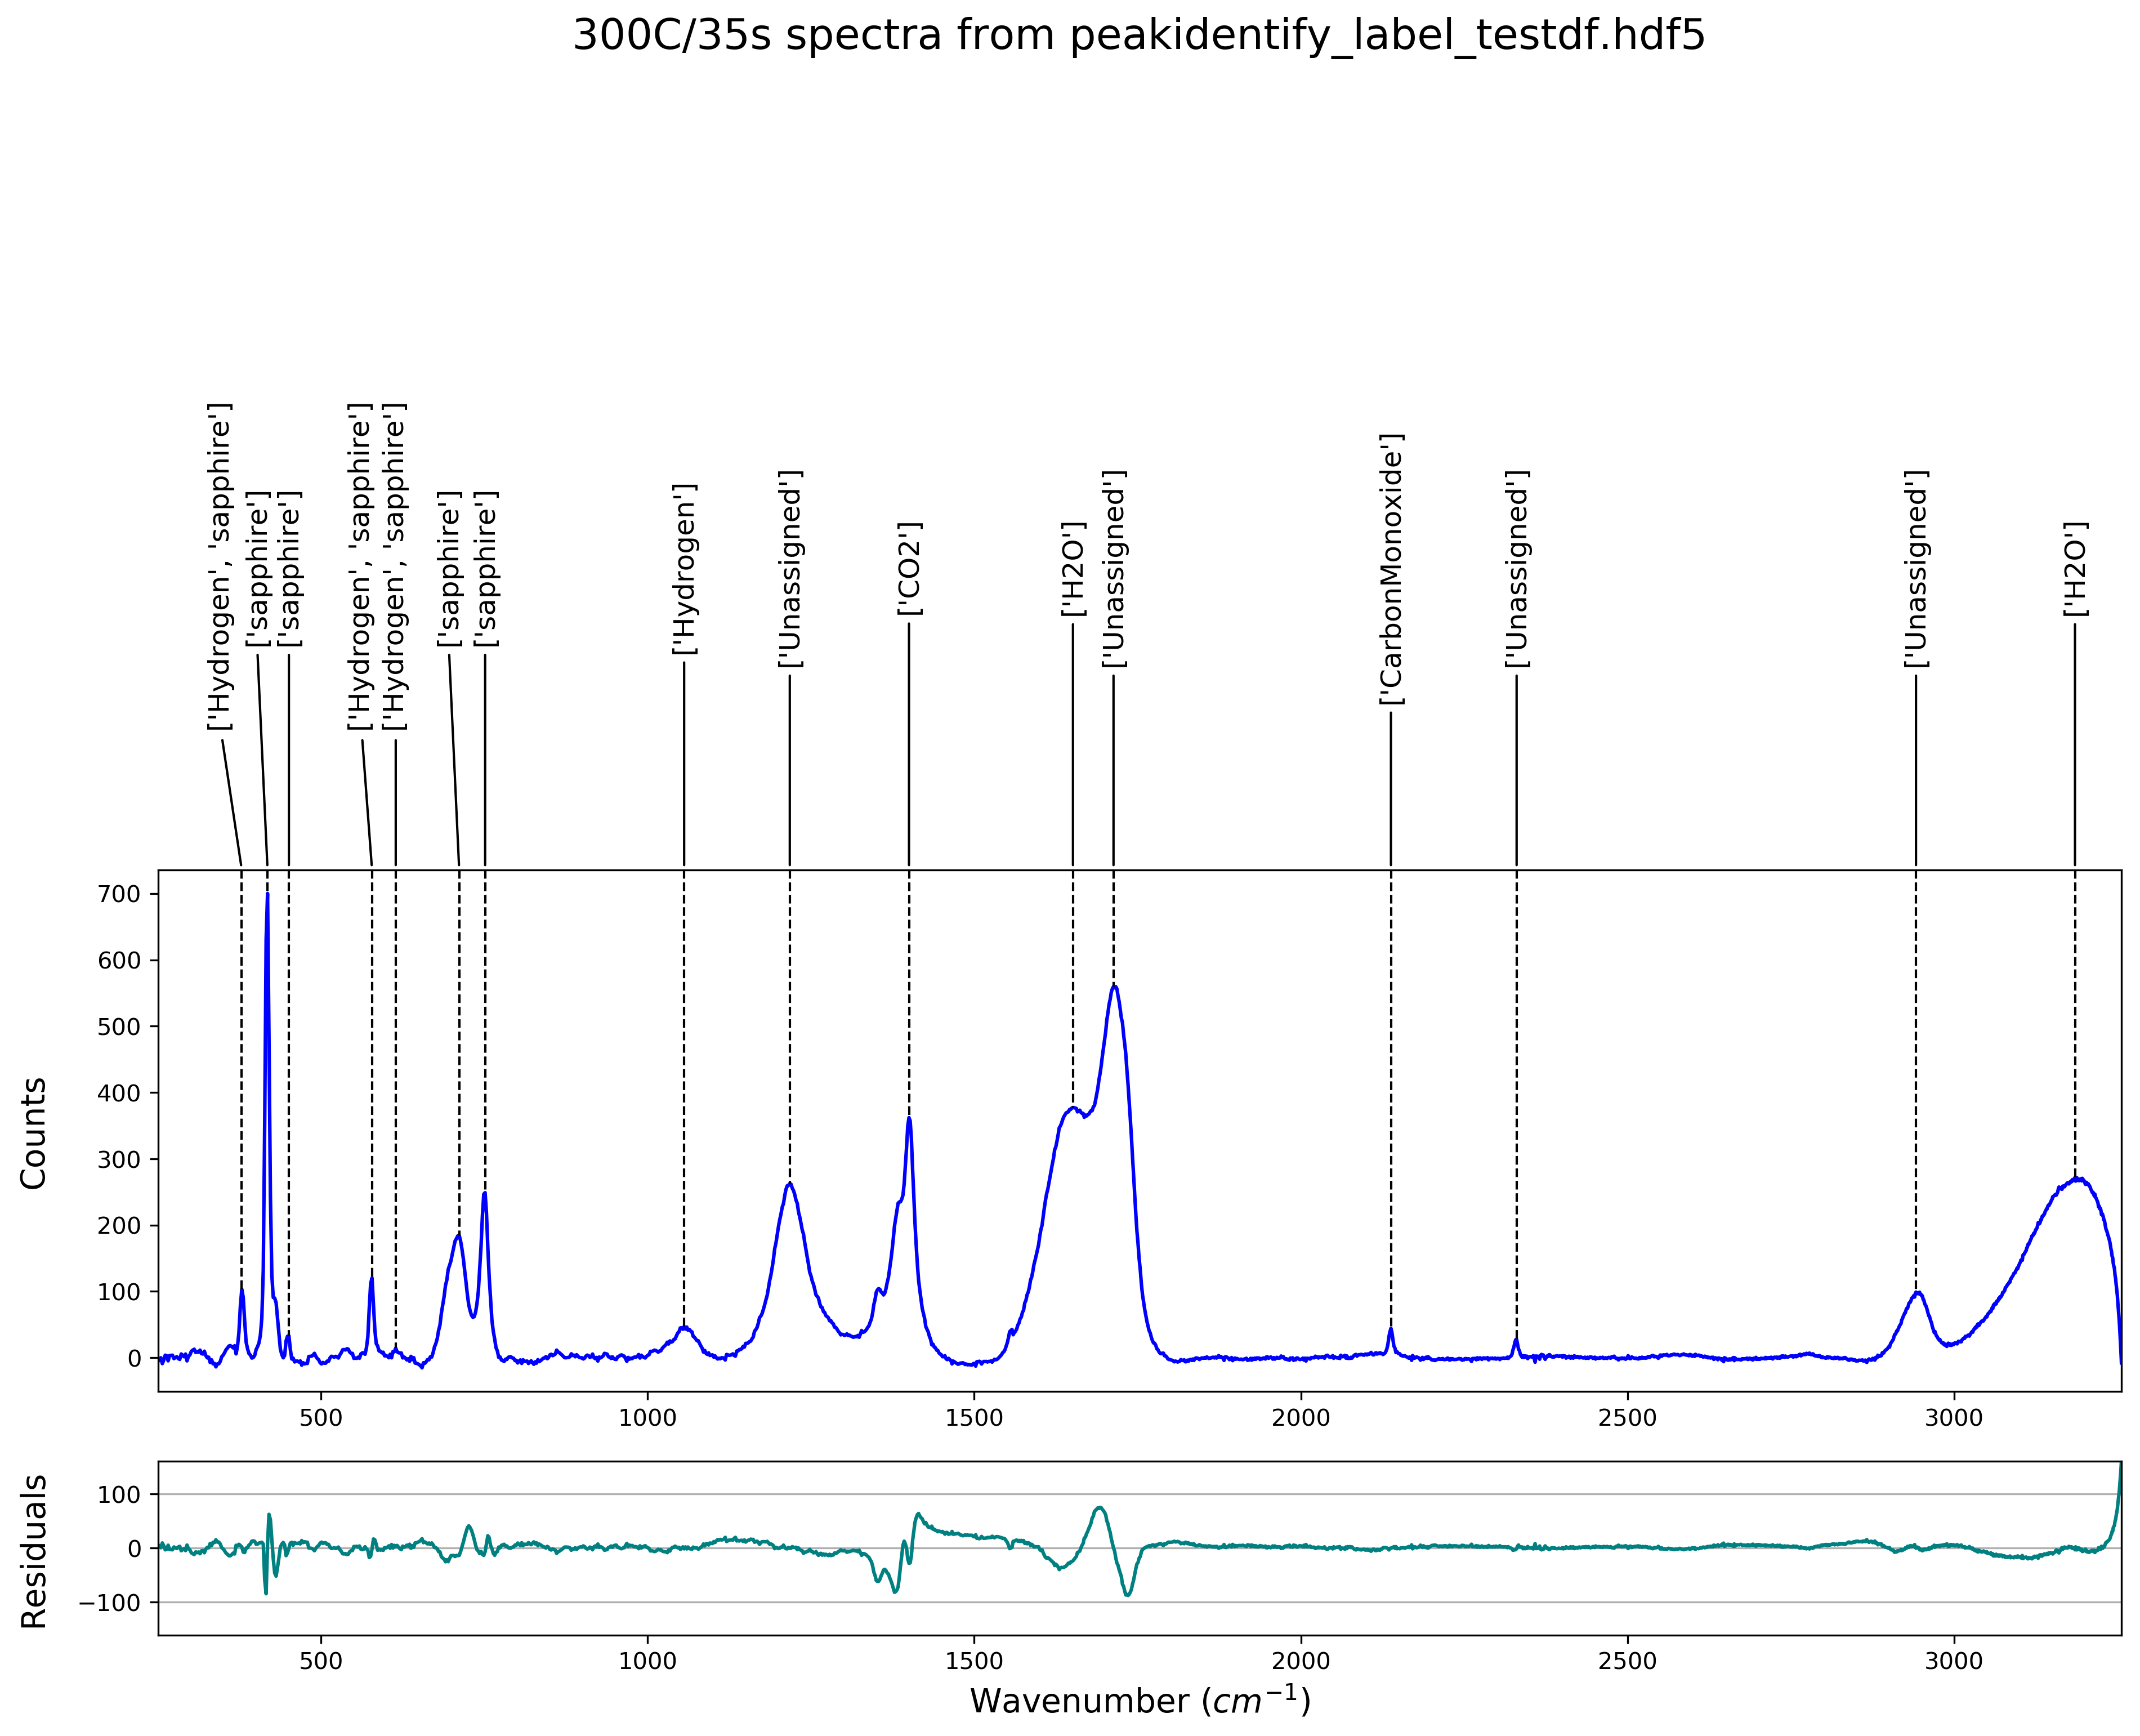

{'CO2': 50.0, 'CarbonMonoxide': 100.0, 'H2O': 100.0, 'Hydrogen': 100.0, 'sapphire': 175.0}


In [18]:
hdf5_calfilename = 'peakidentify_calibration_testML.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'peakidentify_label_testdf.hdf5'
temp = 300
time = 35
unknown_x, unknown_y, unknown_peaks, unknown_peak_assignments, percentages, df2 = peak_assignment(hdf5_expfilename, temp, time, hdf5_calfilename, 50)


Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_01
Peak_1*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_02
Peak_2*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_03
Peak_3*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_04
Peak_4*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_05
Peak_5*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_06
Peak_6*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_07
Peak_7*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_08
Peak_8*
Function did not receive adjusted peak.
        

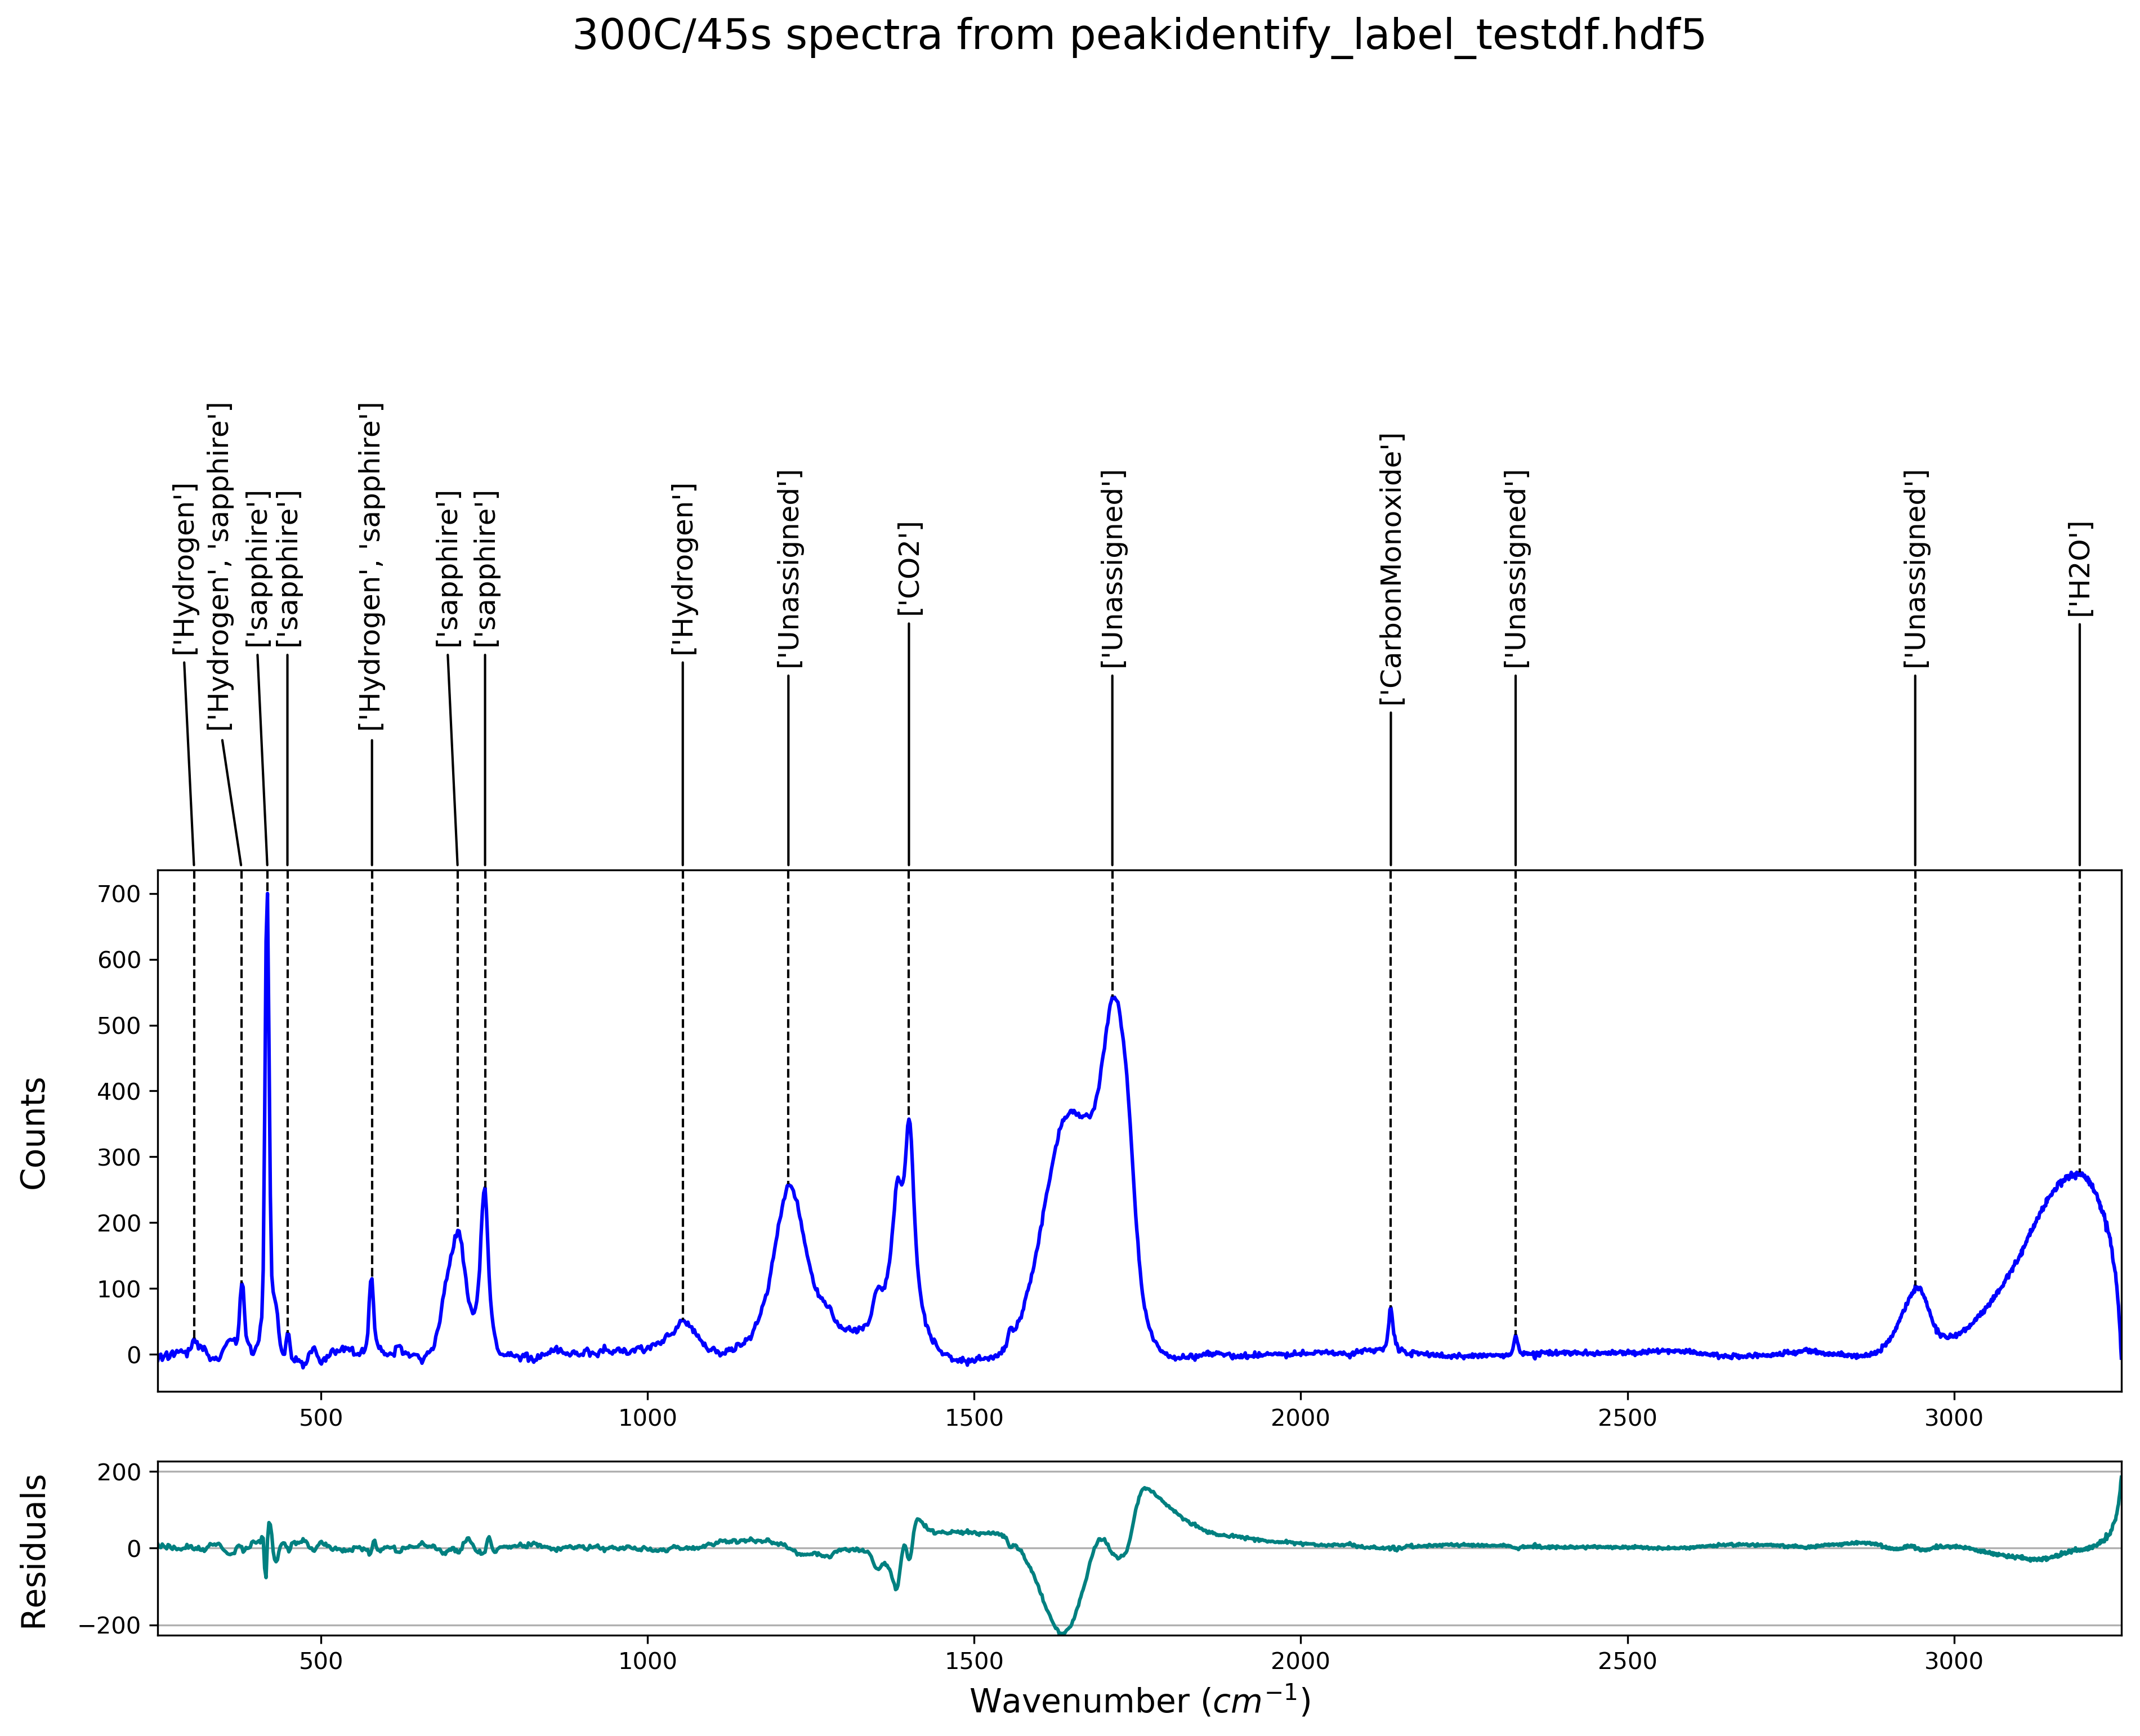

{'CO2': 50.0, 'CarbonMonoxide': 100.0, 'H2O': 50.0, 'Hydrogen': 100.0, 'sapphire': 150.0}


In [19]:
hdf5_calfilename = 'peakidentify_calibration_testML.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'peakidentify_label_testdf.hdf5'
temp = 300
time = 45
unknown_x, unknown_y, unknown_peaks, unknown_peak_assignments, percentages, df3 = peak_assignment(hdf5_expfilename, temp, time, hdf5_calfilename, 50)


Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_01
Peak_1*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_02
Peak_2*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_03
Peak_3*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_04
Peak_4*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_05
Peak_5*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_06
Peak_6*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_07
Peak_7*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_08
Peak_8*
Function did not receive adjusted peak.
        

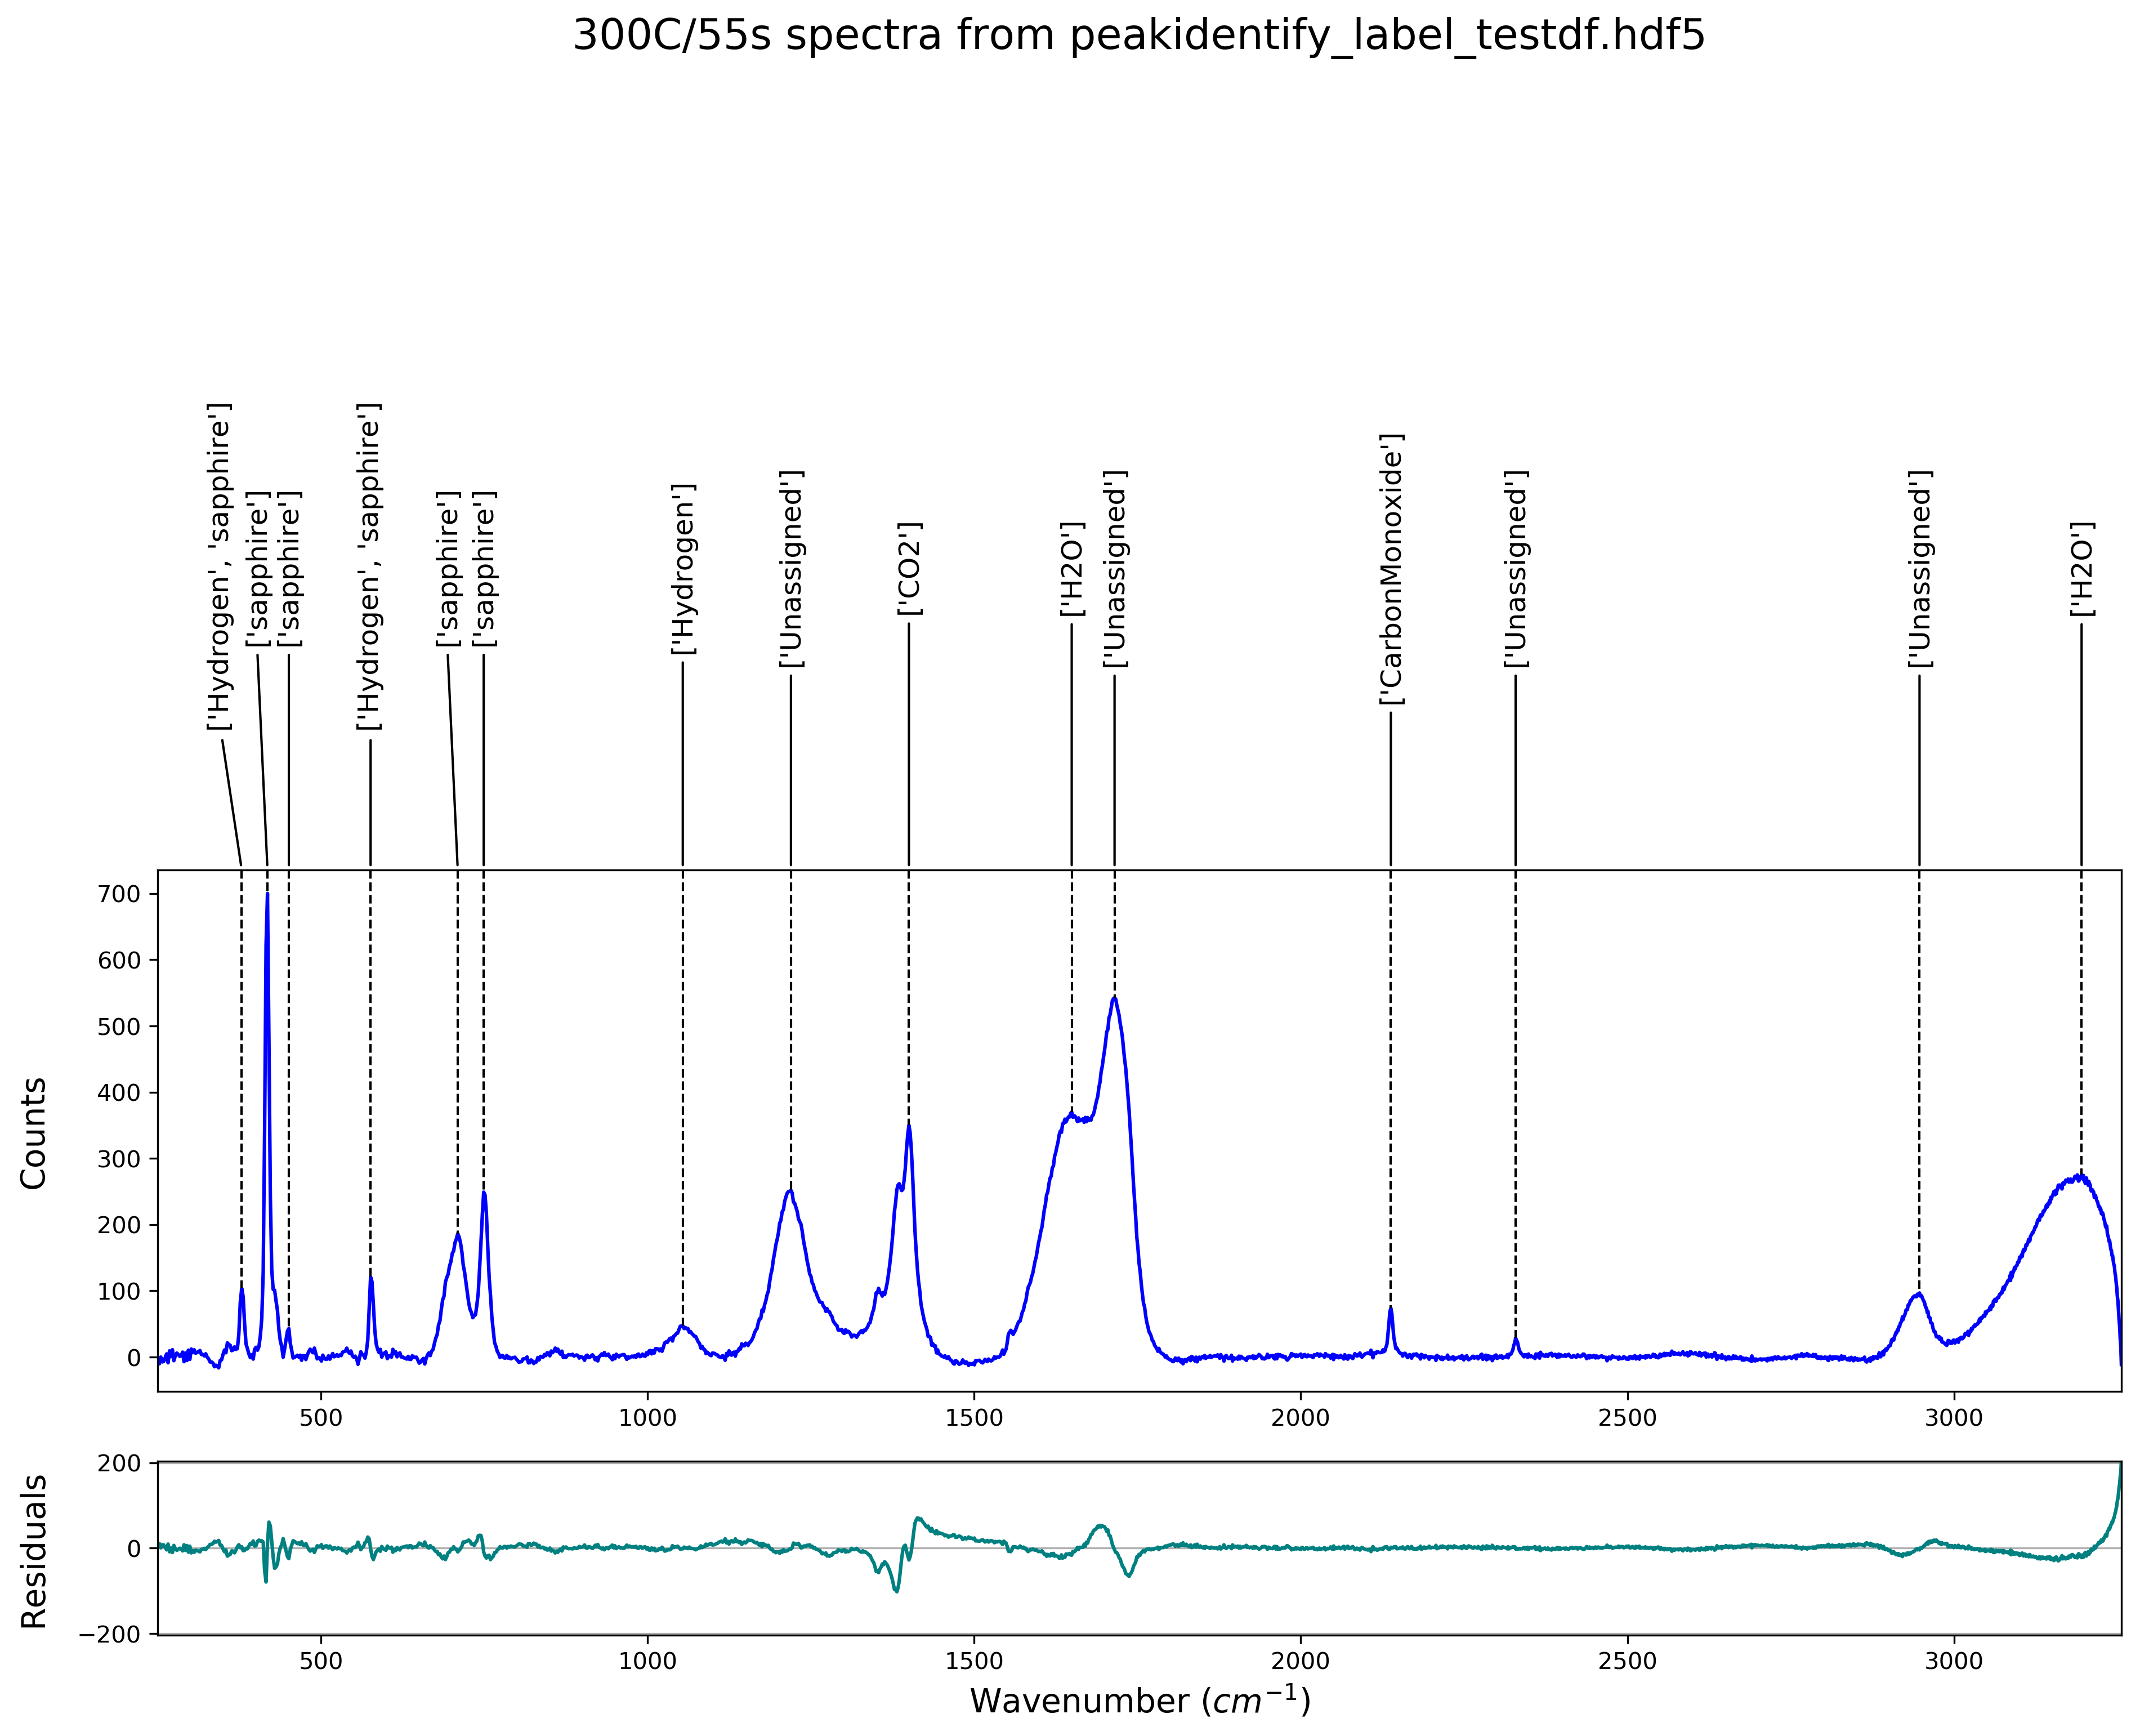

{'CO2': 50.0, 'CarbonMonoxide': 100.0, 'H2O': 100.0, 'Hydrogen': 75.0, 'sapphire': 150.0}


In [20]:
hdf5_calfilename = 'peakidentify_calibration_testML.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'peakidentify_label_testdf.hdf5'
temp = 300
time = 55
unknown_x, unknown_y, unknown_peaks, unknown_peak_assignments, percentages, df4 = peak_assignment(hdf5_expfilename, temp, time, hdf5_calfilename, 50)


Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_01
Peak_1*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_02
Peak_2*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_03
Peak_3*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_04
Peak_4*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_05
Peak_5*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_06
Peak_6*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_07
Peak_7*
Function did not receive adjusted peak.
            The function continued to look for an normal peak.
Peak_08
Peak_8*
Function did not receive adjusted peak.
        

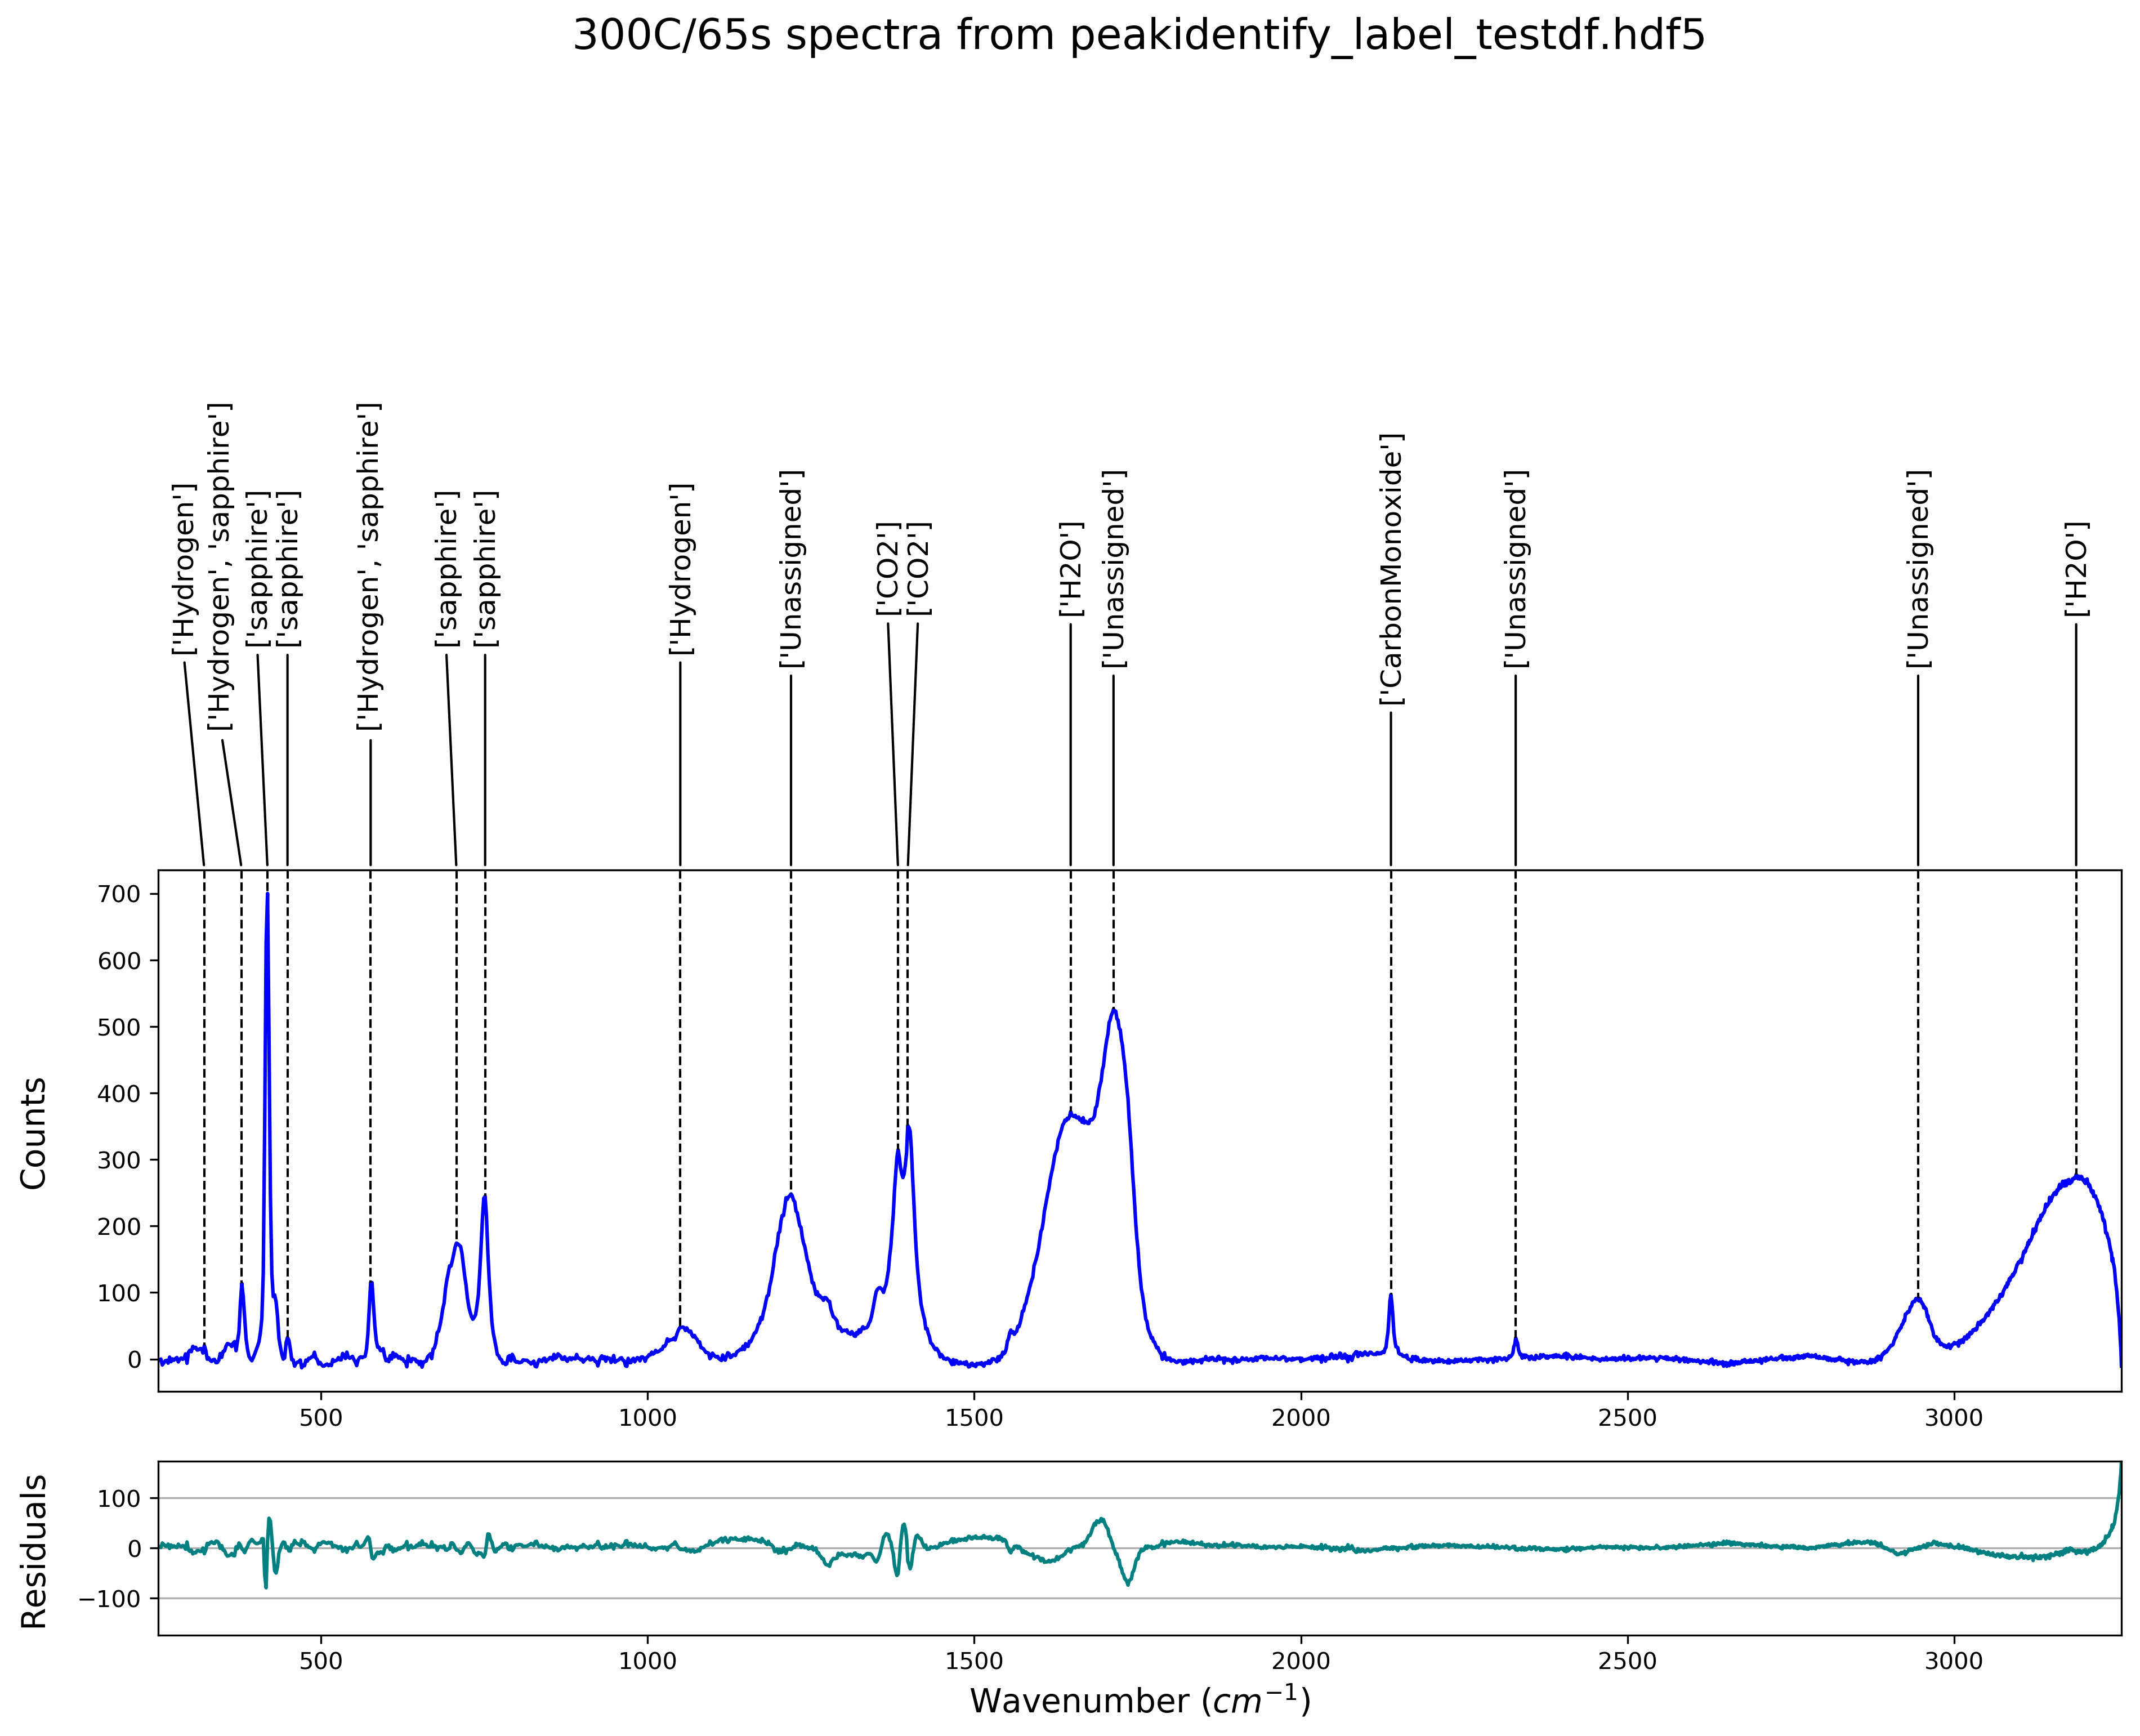

{'CO2': 100.0, 'CarbonMonoxide': 100.0, 'H2O': 100.0, 'Hydrogen': 100.0, 'sapphire': 150.0}


In [21]:
hdf5_calfilename = 'peakidentify_calibration_testML.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'peakidentify_label_testdf.hdf5'
temp = 300
time = 65
unknown_x, unknown_y, unknown_peaks, unknown_peak_assignments, percentages, df5 = peak_assignment(hdf5_expfilename, temp, time, hdf5_calfilename, 50)


In [22]:
frames = [df1,df2,df3,df4,df5]
result = pd.concat(frames,axis=0, join='outer', join_axes= None, ignore_index=False,
          keys=['25s','35s','45s','55s','65s'], levels=None,  names=None, verify_integrity=False,
          copy=True,sort=True)
result

0        1       2        3        4        5        6  \
25s 0  2.66632e-06  9.47784  314.77  251.853  18.9557  12.4817  251.852   
    0     0.506813   4.0129  378.71  1034.01   8.0258   101.26  1028.59   
    0     0.636782  3.84759  418.14  7306.16  7.69519  708.864  7270.35   
    0  2.55231e-05  2.69962  448.67  193.734  5.39924  33.7084  193.741   
    0     0.188666  4.21062  578.11  1090.47  8.42124   114.25  1089.49   
    0  1.38778e-15  20.4979  711.51  6837.15  40.9957  156.677  6837.15   
    0  6.88713e-07  7.19462  751.21  3533.44  14.3892  230.689  3533.44   
    0            0  18.0052  1055.9  1438.24  36.0103  37.5207  1438.24   
    0     0.841161  29.1589  1217.6  20781.3  58.3177  243.997  20534.1   
    0            1  15.8466  1400.1  15275.1  31.6932  306.831  15166.6   
    0  1.05175e-05  47.9173  1649.3  35138.2  95.8346  344.448  35138.2   
    0     0.179058   26.217  1714.9  25828.1   52.434  436.042  25776.7   
    0            1  3.77176  2137.9  285.944  7.54351  24.1317  285.521   
    0     0.489606  3.60812  2328.9  255.955  7.21624  28.0624  255.753   
    0  1.60982e-15  21.9786  2948.2  3553.09  43.9572  75.9353  3553.09   
    0     0.553011  79.8096  3185.1  53203.1  159.619  257.309  41554.6   
35s 0     0.493198  3.84136  378.71   985.18  7.68271  101.316   980.38   
    0     0.642997  3.81059  418.14  7232.34  7.62118   706.73  7196.91   
    0  1.07692e-14  2.61594  450.84  150.018  5.23189  26.9372  150.027   
    0     0.490083  4.12695  578.11  1229.31   8.2539  117.814  1226.57   
    0     0.966028  4.26157  614.36    205.6  8.52315  15.6051  204.764   
    0  1.11022e-15  20.5743  711.51  7441.88  41.1487    169.9  7441.88   
    0  5.93652e-09  7.11561  751.21  3457.79  14.2312  228.257   3457.8   
    0            0  18.2118  1055.9  1501.97  36.4236  38.7388  1501.97   
    0     0.799162  29.0338  1217.6  21598.4  58.0676  259.413  21355.3   
    0            1  15.7745  1400.1  16283.5  31.5491   328.58  16168.3   
    0   4.7038e-08  52.5427  1651.1  37279.7  105.085  333.271  37279.7   
    0     0.177272  26.9016  1713.2    26193  53.8033  431.212  26140.1   
    0     0.982646  4.00883  2137.9  532.343  8.01767  42.6181  531.501   
    0  2.80814e-11  3.97073  2330.3  209.439  7.94147  24.7756  209.423   
...            ...      ...     ...      ...      ...      ...      ...   
55s 0  1.44026e-09  22.0598  450.84  564.472  44.1196  12.0193  564.472   
    0     0.509279  3.81534  575.97  1151.78  7.63068  118.522  1149.33   
    0     0.125301  18.4357  709.41  7213.89  36.8713  176.378  7200.26   
    0   5.8314e-10  7.57921  749.13  3701.02  15.1584  229.369  3701.01   
    0            0  19.0761  1053.9  1560.08  38.1521  38.4145  1560.08   
    0     0.837027  29.9571  1219.5  21520.9  59.9142  246.397  21259.4   
    0     0.999431  16.8627  1400.1  16775.7  33.7254  316.753  16648.9   
    0  0.000354236  48.4212  1649.3  35335.2  96.8425  342.736  35334.9   
    0    0.0432547  26.4808  1714.9  25175.4  52.9617  440.337  25163.2   
    0     0.989022  3.85657  2137.9  903.036  7.71313  74.9231  901.675   
    0     0.356573  4.32746  2328.9  264.943  8.65492  25.4525  264.738   
    0    0.0137614  22.9553  2947.2  4037.55  45.9106  82.2513  4036.09   
    0     0.288957  99.0366  3195.3  58776.6  198.073  252.805  43281.8   
65s 0  1.37457e-07  32.0115  321.41  532.639   64.023  7.81565  530.245   
    0     0.565924  3.90552  378.71  1088.12  7.81105  106.996  1081.93   
    0     0.718582  3.79903  418.14  7499.13  7.59806  712.439   7458.2   
    0  6.24654e-05  2.40069  448.67  139.461  4.80138  27.2864  139.475   
    0     0.558314  4.37962  575.97  1294.38  8.75925   113.84  1290.89   
    0  4.44089e-16  19.3868  707.31  6974.83  38.7736  168.992  6974.83   
    0    0.0110719  7.72501  751.21  3741.78    15.45  226.707  3741.54   
    0  5.55112e-16   20.728    1050  1666.05  41.4559  37.7545  1666.05   
    0     0.902482  31.0561  1219.5  22745

In [23]:
dat = pd.DataFrame()

In [24]:
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labels']= result[:][7]

In [25]:
dat

fraction    sigma  center amplitude     fwhm   height      auc  \
25s 0  2.66632e-06  9.47784  314.77   251.853  18.9557  12.4817  251.852   
    0     0.506813   4.0129  378.71   1034.01   8.0258   101.26  1028.59   
    0     0.636782  3.84759  418.14   7306.16  7.69519  708.864  7270.35   
    0  2.55231e-05  2.69962  448.67   193.734  5.39924  33.7084  193.741   
    0     0.188666  4.21062  578.11   1090.47  8.42124   114.25  1089.49   
    0  1.38778e-15  20.4979  711.51   6837.15  40.9957  156.677  6837.15   
    0  6.88713e-07  7.19462  751.21   3533.44  14.3892  230.689  3533.44   
    0            0  18.0052  1055.9   1438.24  36.0103  37.5207  1438.24   
    0     0.841161  29.1589  1217.6   20781.3  58.3177  243.997  20534.1   
    0            1  15.8466  1400.1   15275.1  31.6932  306.831  15166.6   
    0  1.05175e-05  47.9173  1649.3   35138.2  95.8346  344.448  35138.2   
    0     0.179058   26.217  1714.9   25828.1   52.434  436.042  25776.7   
    0            1  3.77176  2137.9   285.944  7.54351  24.1317  285.521   
    0     0.489606  3.60812  2328.9   255.955  7.21624  28.0624  255.753   
    0  1.60982e-15  21.9786  2948.2   3553.09  43.9572  75.9353  3553.09   
    0     0.553011  79.8096  3185.1   53203.1  159.619  257.309  41554.6   
35s 0     0.493198  3.84136  378.71    985.18  7.68271  101.316   980.38   
    0     0.642997  3.81059  418.14   7232.34  7.62118   706.73  7196.91   
    0  1.07692e-14  2.61594  450.84   150.018  5.23189  26.9372  150.027   
    0     0.490083  4.12695  578.11   1229.31   8.2539  117.814  1226.57   
    0     0.966028  4.26157  614.36     205.6  8.52315  15.6051  204.764   
    0  1.11022e-15  20.5743  711.51   7441.88  41.1487    169.9  7441.88   
    0  5.93652e-09  7.11561  751.21   3457.79  14.2312  228.257   3457.8   
    0            0  18.2118  1055.9   1501.97  36.4236  38.7388  1501.97   
    0     0.799162  29.0338  1217.6   21598.4  58.0676  259.413  21355.3   
    0            1  15.7745  1400.1   16283.5  31.5491   328.58  16168.3   
    0   4.7038e-08  52.5427  1651.1   37279.7  105.085  333.271  37279.7   
    0     0.177272  26.9016  1713.2     26193  53.8033  431.212  26140.1   
    0     0.982646  4.00883  2137.9   532.343  8.01767  42.6181  531.501   
    0  2.80814e-11  3.97073  2330.3   209.439  7.94147  24.7756  209.423   
...            ...      ...     ...       ...      ...      ...      ...   
55s 0  1.44026e-09  22.0598  450.84   564.472  44.1196  12.0193  564.472   
    0     0.509279  3.81534  575.97   1151.78  7.63068  118.522  1149.33   
    0     0.125301  18.4357  709.41   7213.89  36.8713  176.378  7200.26   
    0   5.8314e-10  7.57921  749.13   3701.02  15.1584  229.369  3701.01   
    0            0  19.0761  1053.9   1560.08  38.1521  38.4145  1560.08   
    0     0.837027  29.9571  1219.5   21520.9  59.9142  246.397  21259.4   
    0     0.999431  16.8627  1400.1   16775.7  33.7254  316.753  16648.9   
    0  0.000354236  48.4212  1649.3   35335.2  96.8425  342.736  35334.9   
    0    0.0432547  26.4808  1714.9   25175.4  52.9617  440.337  25163.2   
    0     0.989022  3.85657  2137.9   903.036  7.71313  74.9231  901.675   
    0     0.356573  4.32746  2328.9   264.943  8.65492  25.4525  264.738   
    0    0.0137614  22.9553  2947.2   4037.55  45.9106  82.2513  4036.09   
    0     0.288957  99.0366  3195.3   58776.6  198.073  252.805  43281.8   
65s 0  1.37457e-07  32.0115  321.41   532.639   64.023  7.81565  530.245   
    0     0.565924  3.90552  378.71   1088.12  7.81105  106.996  1081.93   
    0     0.718582  3.79903  418.14   7499.13  7.59806  712.439   7458.2   
    0  6.24654e-05  2.40069  448.67   139.461  4.80138  27.2864  139.475   
    0     0.558314  4.37962  575.97   1294.38  8.75925   113.84  1290.89   
    0  4.44089e-16  19.3868  707.31   6974.83  38.7736  168.992  6974.83   
    0    0.0110719  7.72501  751.21   3741.78    15.45  226.707  3741.54   
    0  5.55112e-16   20.728    1050   1666.05  41.4559  37

Text(0, 0.5, 'auc')

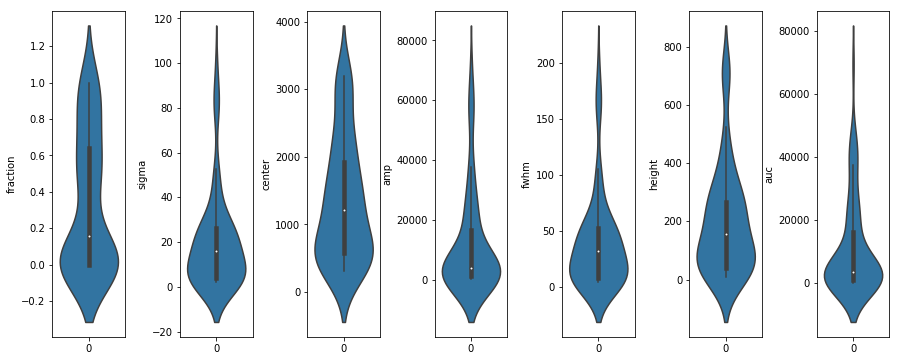

In [26]:
import scipy
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
fig, ax = plt.subplots(ncols=7, figsize=(15, 6))
plt.subplots_adjust(wspace=.75, hspace=.75) 
sns.violinplot(data=dat['fraction'], ax=ax[0],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['sigma'],ax=ax[1],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['center'], ax=ax[2],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['amplitude'],ax=ax[3],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['fwhm'], ax=ax[4],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['height'],ax=ax[5],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['auc'],ax=ax[6],showfliers=True) #boxplot with Outliers are removed from the dataset

ax[0].set_ylabel('fraction') 
ax[1].set_ylabel('sigma') 
ax[2].set_ylabel('center') 
ax[3].set_ylabel('amp') 
ax[4].set_ylabel('fwhm') 
ax[5].set_ylabel('height') 
ax[6].set_ylabel('auc') 

In [27]:
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statistics

# Logistic Regression (Not working so far, NEED Help)

In [ ]:
# fig, ax = plt.subplots(figsize=(5, 3))
# y = dat['fraction'].values
# x = dat['height'].values
# # Create the linear regression model
# LogRegr = linear_model.LogisticRegression() 
# # plotting the balance
# ax.scatter(dat['height'], dat['fraction'], label = 'balance default',color='r')

# # fit the linear model 
# LogRegr.fit(x.reshape(-1,1),y.reshape(-1,1))
# xres = np.array(x).reshape(-1,1)
# plt.plot(x,LogRegr.predict_proba(xres)[:,1],'o',label = 'fit')
# # Find the coefficients B0 and B1
# print('B0, B1: ',LogRegr.intercept_, LogRegr.coef_[0])
# ax.set_ylabel('Probability Default')
# ax.set_xlabel('Balance')
# ax.set_title('Probability Default vs. Balance')
# plt.legend()

# Ordinary Least squares Regression Model by StatsModels (Not working so far, NEED Help)

In [28]:
# # # Ordinary least squares regression model
# results = smf.ols(formula = 'auc ~ height*sigma', data = dat)
# # Fit the results
# resultfit = results.fit()
# # Inspect the results
# print(resultfit.summary())

In [29]:
inputs=['fraction','sigma','center','amplitude','fwhm','height','auc']
X=dat[inputs]
y = dat['labels']

In [30]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1010)

In [31]:
X_train

fraction    sigma  center amplitude     fwhm   height      auc
65s 0     0.558314  4.37962  575.97   1294.38  8.75925   113.84  1290.89
25s 0  2.55231e-05  2.69962  448.67   193.734  5.39924  33.7084  193.741
55s 0     0.356573  4.32746  2328.9   264.943  8.65492  25.4525  264.738
    0     0.837027  29.9571  1219.5   21520.9  59.9142  246.397  21259.4
    0     0.999431  16.8627  1400.1   16775.7  33.7254  316.753  16648.9
45s 0     0.862796  29.0666  1215.6   21443.1  58.1332  250.149  21181.9
    0  1.79676e-09  7.47301  751.21   3697.93   14.946  232.434  3697.93
55s 0   5.8314e-10  7.57921  749.13   3701.02  15.1584  229.369  3701.01
65s 0  6.24654e-05  2.40069  448.67   139.461  4.80138  27.2864  139.475
55s 0     0.509279  3.81534  575.97   1151.78  7.63068  118.522  1149.33
45s 0     0.893636  16.7958  1400.1   15685.9  33.5916  312.316  15580.3
55s 0  0.000354236  48.4212  1649.3   35335.2  96.8425  342.736  35334.9
65s 0     0.902482  31.0561  1219.5   22745.5  62.1121  243.944  22436.6
    0    0.0110719  7.72501  751.21   3741.78    15.45  226.707  3741.54
25s 0     0.636782  3.84759  418.14   7306.16  7.69519  708.864  7270.35
55s 0     0.703791  3.75151  418.14   7305.19  7.50301  707.168  7266.66
25s 0     0.188666  4.21062  578.11   1090.47  8.42124   114.25  1089.49
45s 0            0  19.6816  1053.9   1664.35  39.3631  39.7211  1664.35
    0   0.00165187  7.62038  305.91   284.663  15.2408  17.5373  284.643
25s 0     0.489606  3.60812  2328.9   255.955  7.21624  28.0624  255.753
    0            1  15.8466  1400.1   15275.1  31.6932  306.831  15166.6
35s 0  5.38458e-15  21.0926  2941.7    3800.2  42.1852  84.6279   3800.2
    0     0.966028  4.26157  614.36     205.6  8.52315  15.6051  204.764
    0     0.620784  80.1354  3185.1   57252.4  160.271  268.437  44167.8
55s 0     0.125301  18.4357  709.41   7213.89  36.8713  176.378  7200.26
35s 0   4.7038e-08  52.5427  1651.1   37279.7  105.085  333.271  37279.7
25s 0  6.88713e-07  7.19462  751.21   3533.44  14.3892  230.689  3533.44
35s 0     0.490083  4.12695  578.11   1229.31   8.2539  117.814  1226.57
    0            0  18.2118  1055.9   1501.97  36.4236  38.7388  1501.97
25s 0     0.841161  29.1589  1217.6   20781.3  58.3177  243.997  20534.1
...            ...      ...     ...       ...      ...      ...      ...
65s 0  1.77388e-07  21.4223    2945   3543.28  42.8446  77.6921  3543.28
55s 0    0.0432547  26.4808  1714.9   25175.4  52.9617  440.337  25163.2
65s 0     0.912483  3.84124  2137.9   1113.09  7.68249  96.0772  1111.58
    0  5.55112e-16   20.728    1050   1666.05  41.4559  37.7545  1666.05
55s 0    0.0137614  22.9553  2947.2   4037.55  45.9106  82.2513  4036.09
35s 0     0.982646  4.00883  2137.9   532.343  8.01767  42.6181  531.501
25s 0            1  3.77176  2137.9   285.944  7.54351  24.1317  285.521
45s 0  1.26393e-07  2.86232  2328.9   146.907  5.72464  24.1081   146.95
    0  3.33067e-15  19.5115  709.41    7229.7   39.023  174.047   7229.7
65s 0  1.37457e-07  32.0115  321.41   532.639   64.023  7.81565  530.245
45s 0  1.26121e-13  4.31487  2137.9   559.608  8.62974  60.9192    559.7
65s 0     0.376086  3.76721  2328.9   242.426  7.53443  26.5627  242.265
55s 0     0.160306  3.71902  378.71   855.306  7.43804  102.445  854.012
45s 0  1.39235e-05  2.12077  448.67   113.368  4.24153  25.1092  113.389
25s 0  1.60982e-15  21.9786  2948.2   3553.09  43.9572  75.9353  3553.09
45s 0  1.22125e-14  21.3126  2940.6   3750.93  42.6252  82.6687  3750.94
55s 0     0.989022  3.85657  2137.9   903.036  7.71313  74.9231  901.675
    0  1.44026e-09  22.0598  450.84   564.472  44.1196  12.0193  564.472
35s 0     0.799162  29.0338  1217.6   21598.4  58.0676  259.413  21355.3
    0  2.80814e-11  3.97073  2330.3   209.439  7.94147  24.7756  209.423
65s 0     0.431989  43.0559  1647.6   37745.3  86.1117  354.444  37446.6
    0     0.718582  3.79903  418.14   7499.13  7.59806  712.439   7458.2
55s 0            0  19.0761  1053.9   1560.08  38.1521  38.4145  156

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [33]:
KNNmodel = KNeighborsClassifier(n_neighbors=15) # initialize the model by choosing the number of neighbors (flexibility of model in this case)
# KNNmodel = KNeighborsClassifier(n_neighbors=1) minimum neighbord minimum predicted error
# remember the parabolic function of training vs. test set there is limit to the flexilibility vs. errors of the model
# Expected n_neighbors <= n_samples,  but n_samples = 15, n_neighbors = 20
# thus KNNmodel = KNeighborsClassifier(n_neighbors=15) is max

In [34]:
KNNmodel.fit(X_train, y_train) # feed the model some training data 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [35]:
rate = KNNmodel.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = KNNmodel.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: 0.56
Testing Error Rate: 0.25


In [36]:
# rate.mean() ratio of trues 
rate.mean()

0.25

In [37]:
KNNmodel

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

# Knn visualiztion (not working, NEED help)

In [38]:
# # additional library we will use 
# from matplotlib.colors import ListedColormap

# # just for convenience and similarity with sklearn tutorial
# # I am going to assign our X and Y data to specific vectors
# # this is not strictly needed and you could use elements df for the whole thing!
# elements = dat
# X=elements[['height','auc']]
# print(X)
# #this is a trick to turn our strings (type of element / class) into unique 
# #numbers.  Play with this in a separate cell and make sure you know wth is 
# #going on!
# levels,labels=pd.factorize(elements.labels)
# y=levels
# print(levels)
# #This determines levelspacing for our color map and the colors themselves
# h=0.02
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# # in the sklearn tutorial two different weights are compared
# # the decision between "uniform" and "distance" determines the probability
# # weight.  "uniform" is the version presented in class, you can change to 
# # distance
# # weights='uniform'
# weights='distance'

# # I am actually refitting the KNN here. If you had a big data set you would
# # not do this, but I want you to have the convenience of changing K or 
# # weights here in this cell. Large training sets with many features can take 
# # awhile for KNN training! 

# K=5
# clf = KNeighborsClassifier(n_neighbors=K, weights=weights)
# clf.fit(X,y)

# # Straight from the tutorial - quickly read and see if you know what these 
# # things are going - if you are < 5 min until end then you should skip this part 

# # Plot the decision boundary. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
# x_min, x_max = elements.height.min() - 0.1  , elements.height.max() + 0.1
# y_min, y_max = elements.auc.min() - 0.1  , elements.auc.max() + 0.1  
# print(y_min, y_max, h)
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
#                      np.arange(y_min, y_max, h))

# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(figsize=(4,4));
# #plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_light,vmin=0,vmax=np.max(y))
# # Plot also the training points
# # This may be the 1st time you have seen how to color points by a 3rd vector
# # In this case y ( see c=y in below statement ). This is very useful! 
# plt.scatter(X.height, X.auc, c=y, cmap=cmap_bold)

# # Set limits and lebels 
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xlabel('height')
# plt.ylabel('auc')

# Multiple Linear Regression

In [39]:
train,test = train_test_split(dat, test_size=0.2, random_state=1000)

This is for Y =1
Train error 458.92718165685835
Test error 428.2758442491056
This is for Y =2
Train error 534761.9926129344
Test error 524506.5309374536
This is for Y =3
Train error 47232768.236765526
Test error 23480123.74630555
This is for Y =4
Train error 5.226937237903872e-24
Test error 3.672399111128769e-24
This is for Y =5
Train error 17878.876381187427
Test error 18541.614259941267


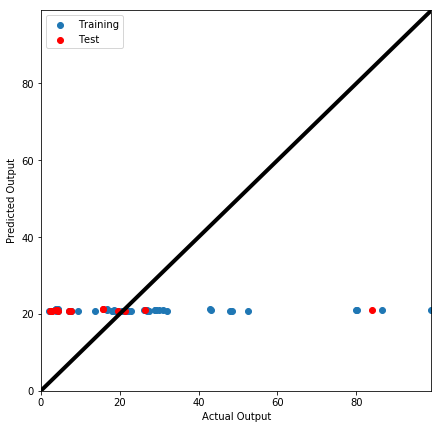

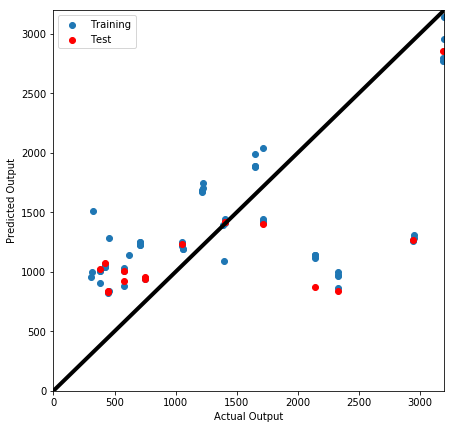

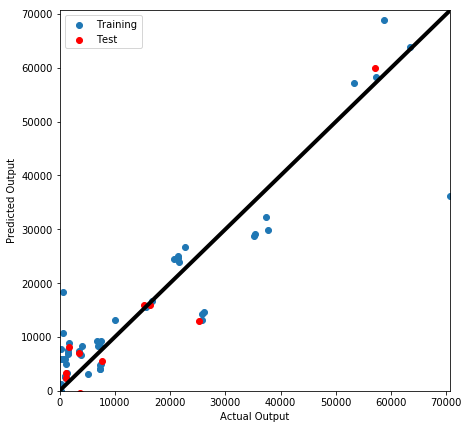

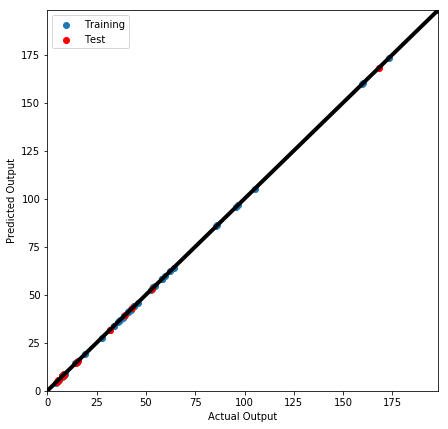

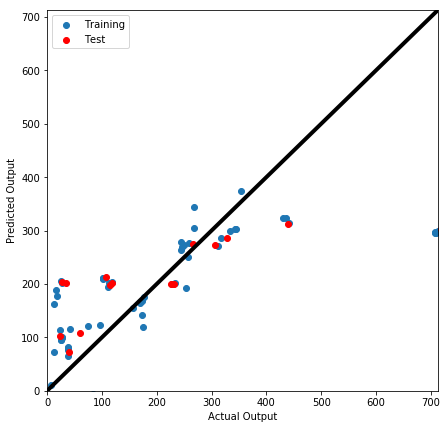

In [40]:
# train linear model of descriptors
yrange =  np.arange(1,6,1)
for Y in yrange:
    MLR=linear_model.LinearRegression()
    MLR.fit(train[train.columns.values[0:Y]],train[train.columns.values[Y]])
    # WE are going to train using the first 8 values

    # make predictions on test and train set 
    trainpred=MLR.predict(train[train.columns.values[0:Y]])
    # predict the outputs using the training dataset
    testpred=MLR.predict(test[train.columns.values[0:Y]])
    # predict using test dataset
    #make parity plot 
    maxlimit  = train[train.columns.values[Y]].max()

    plt.figure(figsize=(7,7))
    plt.xlim([0,maxlimit]);
    plt.ylim([0,maxlimit]);
    print('This is for Y ='+str(Y))
    plt.scatter(train[train.columns.values[Y]],trainpred, label='Training')
    plt.scatter(test[train.columns.values[Y]],testpred,color='r', label='Test')
    plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

    #calculate the test and train error
    
    print("Train error",mean_squared_error(train[train.columns.values[Y]],trainpred)) # MSE of training dataset
    print("Test error",mean_squared_error(test[train.columns.values[Y]],testpred))
    # usually the training error is less than the test error

# Changing begining and ending columns to describe regression relationships
# ie changing X and Y

69409.36892887966
This is for Y =6
Train error 3841179.8794675455
Test error 2657165.3315958297
69409.36892887966
This is for Y =6
Train error 4231886.860967684
Test error 2328820.820713249
69409.36892887966
This is for Y =6
Train error 4231886.860967684
Test error 2328820.8207132695
69409.36892887966
This is for Y =6
Train error 4332454.982982181
Test error 2116391.0301654544
69409.36892887966
This is for Y =6
Train error 42878176.90196388
Test error 15280001.082685867
69409.36892887966
This is for Y =6
Train error 171989436.61184284
Test error 123890999.58961092


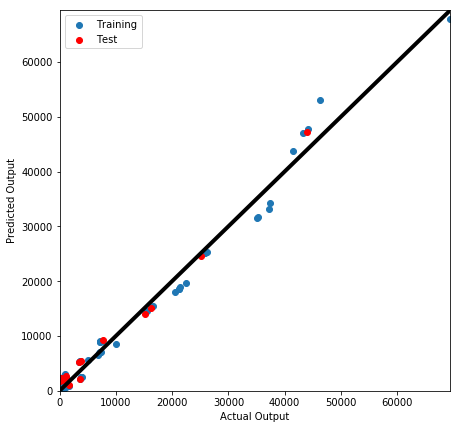

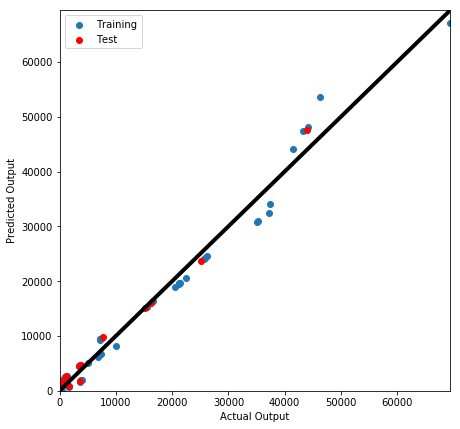

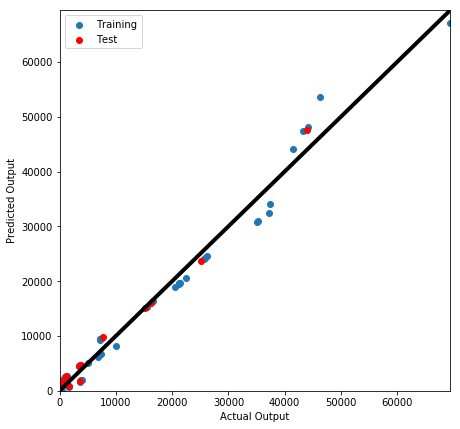

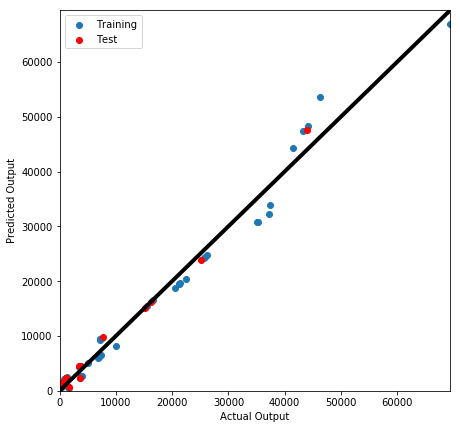

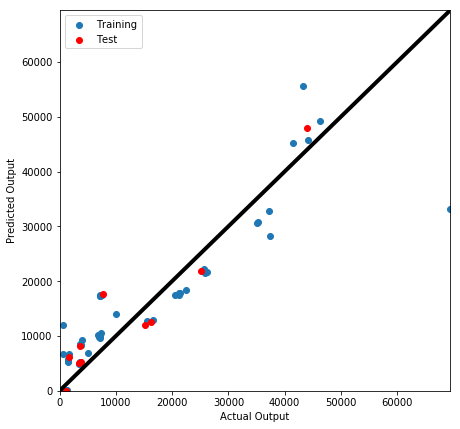

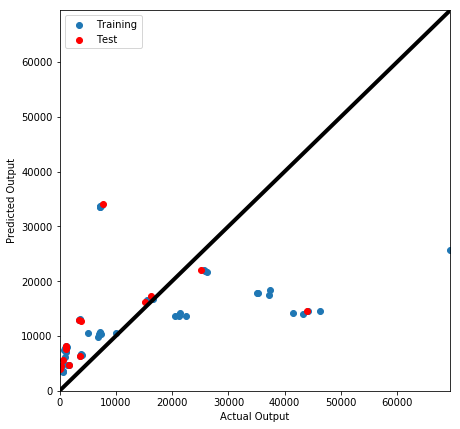

In [41]:
xrange =  np.arange(0,6,1)
Y=6
for X in xrange:    
    MLR=linear_model.LinearRegression()
    MLR.fit(train[train.columns.values[X:Y]],train[train.columns.values[Y]])
    # WE are going to train using the first 8 values

    # make predictions on test and train set 
    trainpred=MLR.predict(train[train.columns.values[X:Y]])
    # predict the outputs using the training dataset
    testpred=MLR.predict(test[train.columns.values[X:Y]])
    # predict using test dataset
    #make parity plot 
    maxlimit  = train[train.columns.values[Y]].max()
    print(maxlimit)
    plt.figure(figsize=(7,7))
    plt.xlim([0,maxlimit]);
    plt.ylim([0,maxlimit]);
    print('This is for Y ='+str(Y))
    plt.scatter(train[train.columns.values[Y]],trainpred, label='Training')
    plt.scatter(test[train.columns.values[Y]],testpred,color='r', label='Test')
    plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

    #calculate the test and train error
    
    print("Train error",mean_squared_error(train[train.columns.values[Y]],trainpred)) # MSE of training dataset
    print("Test error",mean_squared_error(test[train.columns.values[Y]],testpred))
    # usually the training error is less than the test error

# Ridge & Lasso Regression

In [42]:
from sklearn import linear_model
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#normalized data for Ridge / LASSO 
# train_normalized=train/train.std()
# test_normalized=test/test.std()
scaler = StandardScaler().fit(train[inputs])
train_normalized = pd.DataFrame(data=scaler.transform(train[inputs]), columns=train.columns[:-1])
test_normalized = pd.DataFrame(data=scaler.transform(test[inputs]), columns=test.columns[:-1])

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  del sys.path[0]


In [43]:
test_normalized.head()

fraction     sigma    center  amplitude      fwhm    height       auc
0  1.120456 -0.802654 -1.054691  -0.277482 -0.802654  2.839866 -0.258372
1  1.750688 -0.243307  0.050741   0.210295 -0.243307  0.707268  0.296945
2 -0.921394  0.020326  1.789898  -0.513915  0.020326 -0.662583 -0.526863
3  0.388147 -0.787006 -0.874606  -0.645450 -0.787006 -0.443517 -0.678033
4 -0.921394 -0.846037  1.096329  -0.706979 -0.846037 -0.955153 -0.748480

This is for Y =1
Train error 0.9999756581019268
Test error 0.9334499378890406
This is for Y =2
Train error 0.683726646294782
Test error 0.6770470733155309
This is for Y =3
Train error 0.17404962020482637
Test error 0.05928290867848478
This is for Y =4
Train error 0.023789649986555392
Test error 0.021318046820724447
This is for Y =5
Train error 0.6074327724862842
Test error 0.6132315329059121


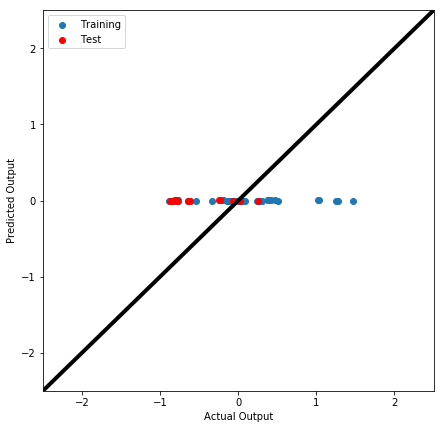

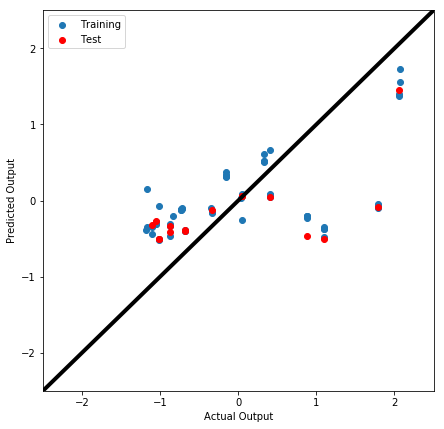

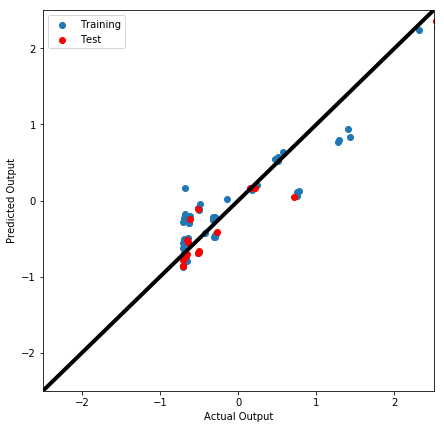

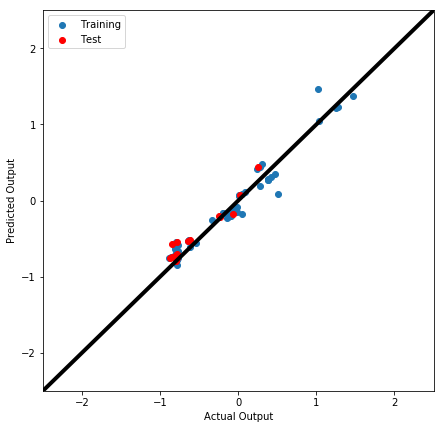

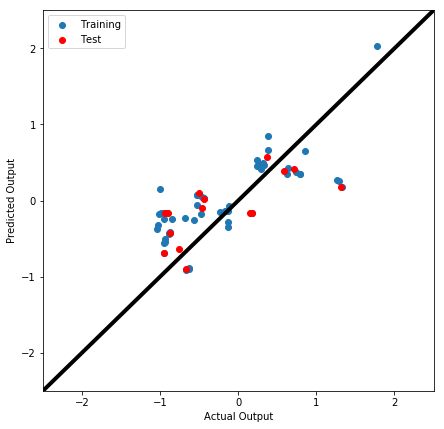

In [44]:
raman_ridge=Ridge()
yrange =  np.arange(1,6,1)
for Y in yrange:
    a=1e1
    raman_ridge.set_params(alpha=a)
    raman_ridge.fit(train_normalized[train.columns.values[0:Y]],train_normalized[train.columns.values[Y]])
    print('This is for Y ='+str(Y))
    print("Train error",mean_squared_error(train_normalized[train.columns.values[Y]],raman_ridge.predict(
            train_normalized[train.columns.values[0:Y]])))

    print("Test error",mean_squared_error(test_normalized[train.columns.values[Y]],raman_ridge.predict(
            test_normalized[train.columns.values[0:Y]])))
    plt.figure(figsize=(7,7))
    plt.xlim([-2.5,2.5]);
    plt.ylim([-2.5,2.5]);
    plt.scatter(train_normalized[train.columns.values[Y]],raman_ridge.predict(
            train_normalized[train.columns.values[0:Y]]), label='Training')
    plt.scatter(test_normalized[train.columns.values[Y]],raman_ridge.predict(
            test_normalized[train.columns.values[0:Y]]),color='r', label='Test')
    maxlimit  = train[train.columns.values[Y]].max()
    minlimit  = train[train.columns.values[Y]].min()
    plt.plot([-2.5,2.5],[-2.5,2.5],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

This is for X =0& Y =6
Train error 0.058419949182851184
Test error 0.017997243460213745
This is for X =1& Y =6
Train error 0.05786094991414587
Test error 0.016776651925119793
This is for X =2& Y =6
Train error 0.053896745980361094
Test error 0.015492063606441618
This is for X =3& Y =6
Train error 0.053024238656986265
Test error 0.015262926113635392
This is for X =4& Y =6
Train error 0.19444786533617436
Test error 0.05654847701543744
This is for X =5& Y =6
Train error 0.7373238479500615
Test error 0.5120148950151119


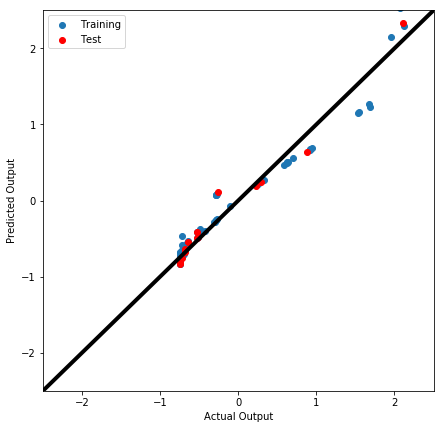

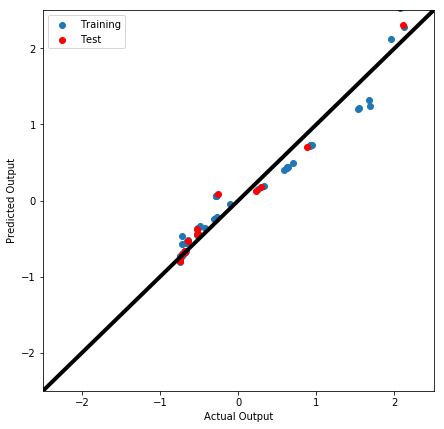

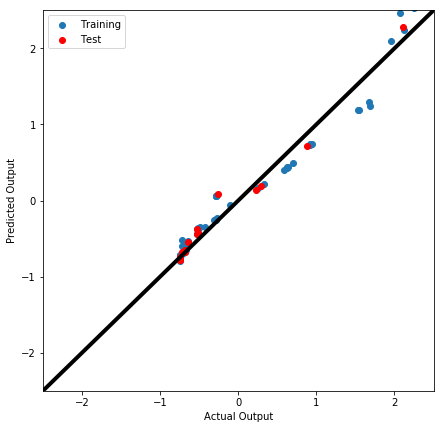

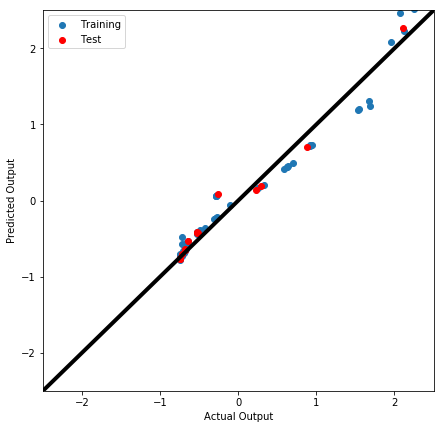

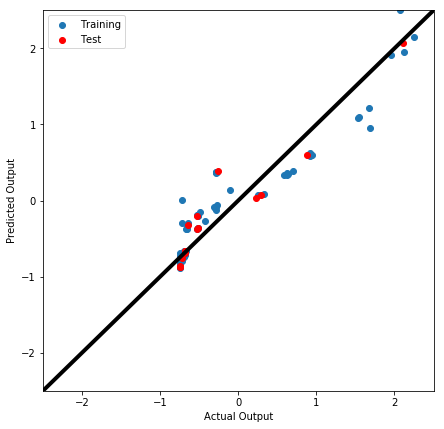

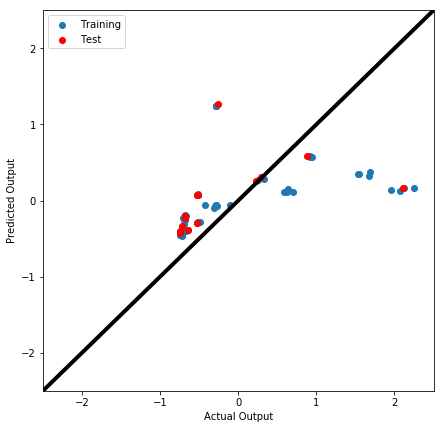

In [45]:
raman_ridge=Ridge()
xrange =  np.arange(0,6,1)
Y=6
for X in xrange:
    a=1e1
    raman_ridge.set_params(alpha=a)
    raman_ridge.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    print('This is for X ='+str(X)+'& Y =' + str(Y))
    print("Train error",mean_squared_error(train_normalized[train.columns.values[Y]],raman_ridge.predict(
            train_normalized[train.columns.values[X:Y]])))

    print("Test error",mean_squared_error(test_normalized[train.columns.values[Y]],raman_ridge.predict(
            test_normalized[train.columns.values[X:Y]])))
    plt.figure(figsize=(7,7))
    plt.xlim([-2.5,2.5]);
    plt.ylim([-2.5,2.5]);
    plt.scatter(train_normalized[train.columns.values[Y]],raman_ridge.predict(
            train_normalized[train.columns.values[X:Y]]), label='Training')
    plt.scatter(test_normalized[train.columns.values[Y]],raman_ridge.predict(
            test_normalized[train.columns.values[X:Y]]),color='r', label='Test')
    maxlimit  = train[train.columns.values[Y]].max()
    minlimit  = train[train.columns.values[Y]].min()
    plt.plot([-2.5,2.5],[-2.5,2.5],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

## 2-2 Example of searching the $\alpha$ space in RR

In [46]:
train,test = train_test_split(dat, test_size=0.2, random_state=1000)

In [47]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

Y = 6
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,200) # SEACH THE RANGE OF THE LAMBDA SPACE
model=Ridge()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(train_normalized[train.columns.values[Y]],model.predict(
        train_normalized[train.columns.values[X:Y]])))
    testerror.append(mean_squared_error(test_normalized[train.columns.values[Y]],model.predict(
        test_normalized[train.columns.values[X:Y]])))


Text(0.5, 1.0, 'error vs $\\lambda$')

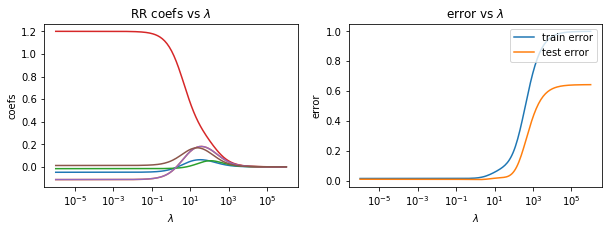

In [48]:
# what is being plotted here? 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc=1)
plt.title('error vs $\lambda$')


# Part 3: LASSO regression  (same data as Part 1)

* The lasso improves over ridge by also providing a variable selection tool!
* The lasso minimizer is $RSS + \lambda \sum_{j=1}^{p}\lvert\beta_j\rvert$
* Ridge regression does not set any of the coefficients exactly to zero but can shrink all of them
- final model still includes all p predictors
- Lasso is similar to ridge regression with a absolute value
- It provides the possibility that some of the coeeficients can take a value of zero.
- Like ri

This is for Y =1
Train error 0.016355060023201026
Test error 0.011313545424135396
This is for Y =2
Train error 0.016355060025815122
Test error 0.011313511078394558
This is for Y =3
Train error 0.01635506002916879
Test error 0.011313474181927692
This is for Y =4
Train error 0.01635506003202654
Test error 0.011313457049128159
This is for Y =5
Train error 0.01635506003503392
Test error 0.011313450207611127


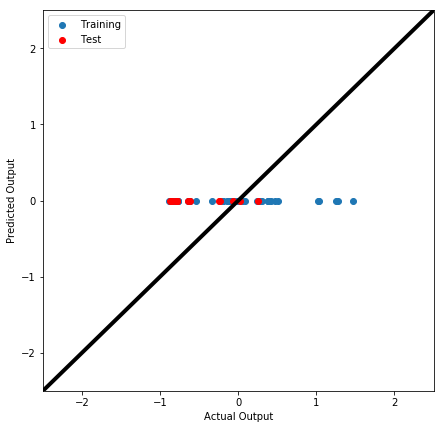

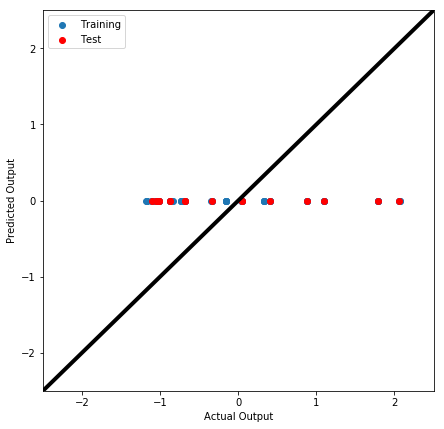

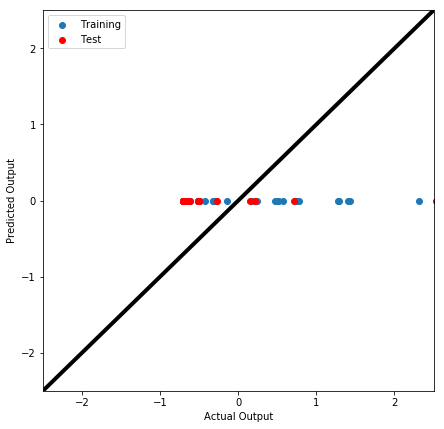

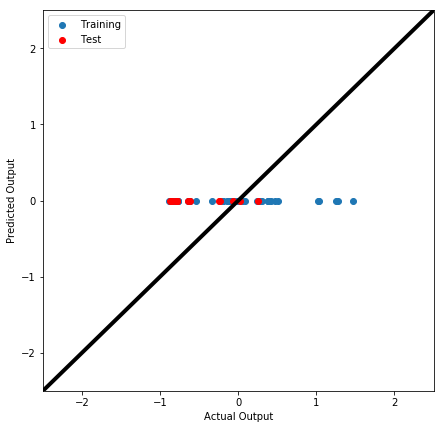

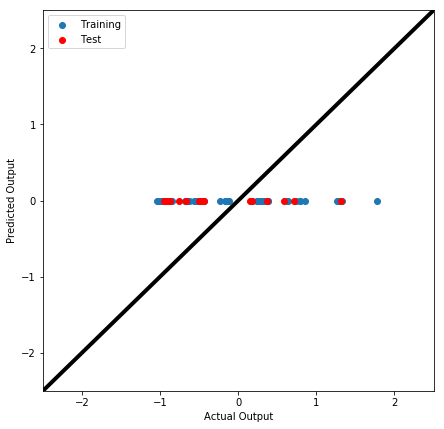

In [49]:
# also based on sklearn tutorials
# what the hell is happening in this cell?
coefs = []
trainerror = []
testerror = []

lambdas = np.logspace(-6,6,200)
model=linear_model.Lasso()
Y = 6
X = 0
# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l,max_iter=1e6)
    model.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(train_normalized[train.columns.values[Y]],model.predict(
        train_normalized[train.columns.values[X:Y]])))
    testerror.append(mean_squared_error(test_normalized[train.columns.values[Y]],model.predict(
        test_normalized[train.columns.values[X:Y]])))
yrange =  np.arange(1,6,1)
for Y in yrange:
    a=1e1
    model.set_params(alpha=a)
    model.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    print('This is for Y ='+str(Y))
    print("Train error",trainerror[Y])
    print("Test error",testerror[Y])
    plt.figure(figsize=(7,7))
    plt.xlim([-2.5,2.5]);
    plt.ylim([-2.5,2.5]);
    plt.scatter(train_normalized[train.columns.values[Y]],model.predict(
        train_normalized[train.columns.values[X:Y]]), label='Training')
    plt.scatter(test_normalized[train.columns.values[Y]],model.predict(
        test_normalized[train.columns.values[X:Y]]),color='r', label='Test')
    maxlimit  = train[train.columns.values[Y]].max()
    minlimit  = train[train.columns.values[Y]].min()
    plt.plot([-2.5,2.5],[-2.5,2.5],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

This is for Y =6
Train error 0.016355060044520805
Test error 0.011313360753135156
This is for Y =6
Train error 0.016355060044520805
Test error 0.011313360753135156
This is for Y =6
Train error 0.016355060044520805
Test error 0.011313360753135156
This is for Y =6
Train error 0.016355060044520805
Test error 0.011313360753135156
This is for Y =6
Train error 0.016355060044520805
Test error 0.011313360753135156
This is for Y =6
Train error 0.016355060044520805
Test error 0.011313360753135156


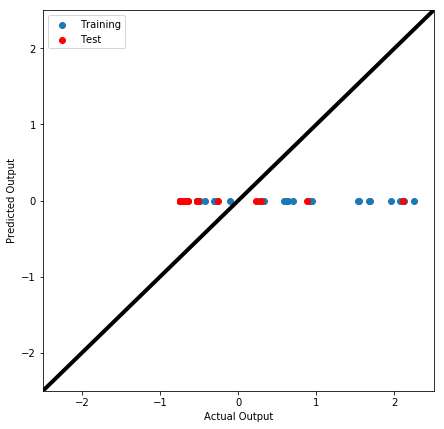

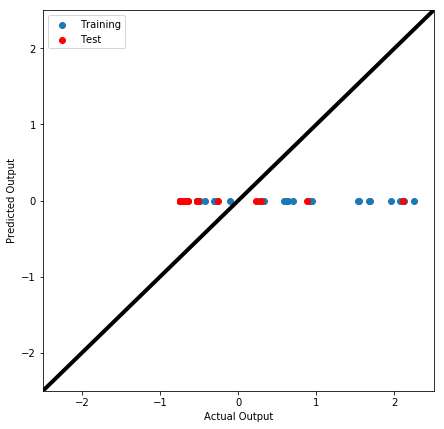

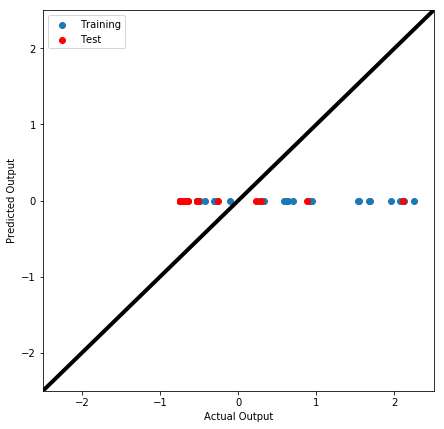

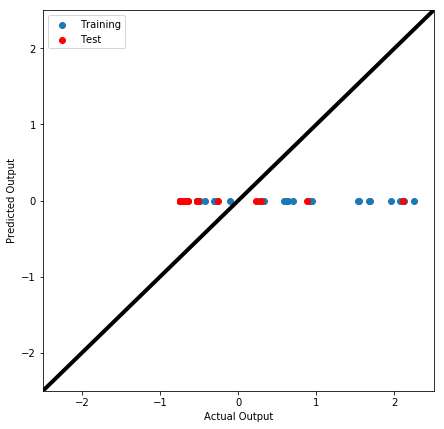

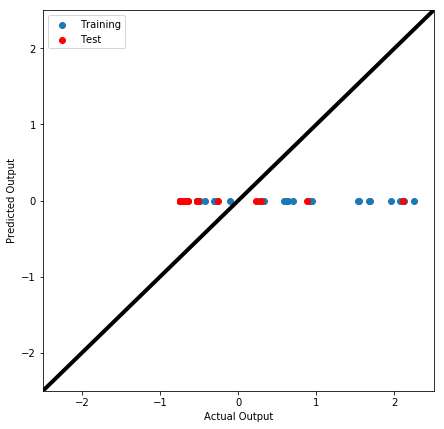

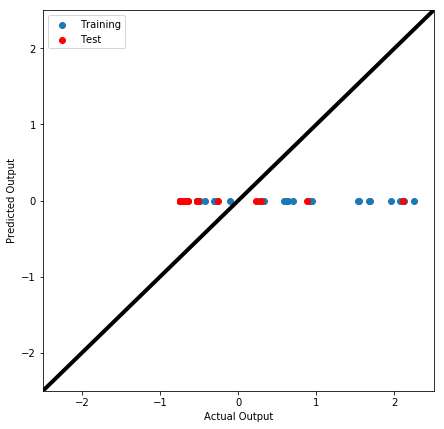

In [50]:
# also based on sklearn tutorials
# what the hell is happening in this cell?
coefs = []
trainerror = []
testerror = []

lambdas = np.logspace(-6,6,200)
model=linear_model.Lasso()
Y = 6
X = 0
# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l,max_iter=1e6)
    model.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(train_normalized[train.columns.values[Y]],model.predict(
        train_normalized[train.columns.values[X:Y]])))
    testerror.append(mean_squared_error(test_normalized[train.columns.values[Y]],model.predict(
        test_normalized[train.columns.values[X:Y]])))
xrange =  np.arange(0,6,1)
for X in xrange:
    a=1e1
    model.set_params(alpha=a)
    model.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    print('This is for Y ='+str(Y))
    print("Train error",trainerror[Y])
    print("Test error",testerror[Y])
    plt.figure(figsize=(7,7))
    plt.xlim([-2.5,2.5]);
    plt.ylim([-2.5,2.5]);
    plt.scatter(train_normalized[train.columns.values[Y]],model.predict(
        train_normalized[train.columns.values[X:Y]]), label='Training')
    plt.scatter(test_normalized[train.columns.values[Y]],model.predict(
        test_normalized[train.columns.values[X:Y]]),color='r', label='Test')
    maxlimit  = train[train.columns.values[Y]].max()
    minlimit  = train[train.columns.values[Y]].min()
    plt.plot([-2.5,2.5],[-2.5,2.5],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

Text(0.5, 1.0, 'error vs $\\lambda$')

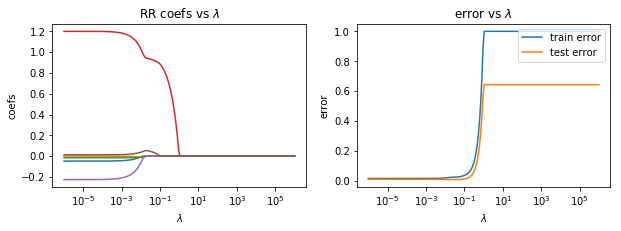

In [51]:
plt.figure(figsize=(10,3))
plt.locator_params(nbins=5)
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
#plt.xlim(1e-4,1e0)

plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
#plt.xlim(1e-4,1e0)
#plt.ylim(0,0.5)
plt.legend(loc=1)
plt.title('error vs $\lambda$')

# WE SIMPLIFIED OUR MODEL BY GETTING RID OF THE RR COEFS NOT EQUAL TO ZERO AT ZERO LAMBDA.


### Other things to consider if you have more time 

* Note we did not scale the features in the MLR, try it out and verify the final error doesnt' change!
* Make sure you undersand how to make _predictions_ with supervised learning models that are trained on scaled/normalized data
* Plot the residuals and verify if errors are distributed normally
* Make a parity plot including the predictions from ridge and LASSO 
* Compare errors between all three 
* Explore the effect of training/testing split 
* Look at the shrinkage/regularization situation when predicting Y2 vs Y1...

# Trying to see if any of these descriptors 
# ['fraction','sigma','center','amplitude','fwhm','height','auc']

# can relate to the peakidentified labels


# Support Vector Machine 

In [52]:
inputs=['fraction','sigma','center','amplitude','fwhm','height','auc']
X=dat[inputs]
y = dat['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010)

# Linear SVM

In [55]:
#Import svm model
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[2 0 0 0 0]
 [0 4 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 2 0 3]]
                          precision    recall  f1-score   support

                 ['CO2']       1.00      1.00      1.00         2
                 ['H2O']       1.00      1.00      1.00         4
['Hydrogen', 'sapphire']       0.50      1.00      0.67         2
          ['Unassigned']       1.00      1.00      1.00         3
            ['sapphire']       1.00      0.60      0.75         5

               micro avg       0.88      0.88      0.88        16
               macro avg       0.90      0.92      0.88        16
            weighted avg       0.94      0.88      0.88        16

Accuracy: 0.875


In [57]:
# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred),average='macro')

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred), average='macro')

# Polynomial kernal (https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/)

In [58]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=8)  
svclassifier.fit(X_train, y_train)  

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
y_pred = svclassifier.predict(X_test)  

In [60]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[0 0 0 0 2]
 [0 0 0 0 4]
 [0 0 0 0 2]
 [0 0 0 0 3]
 [0 0 0 0 5]]
                          precision    recall  f1-score   support

                 ['CO2']       0.00      0.00      0.00         2
                 ['H2O']       0.00      0.00      0.00         4
['Hydrogen', 'sapphire']       0.00      0.00      0.00         2
          ['Unassigned']       0.00      0.00      0.00         3
            ['sapphire']       0.31      1.00      0.48         5

               micro avg       0.31      0.31      0.31        16
               macro avg       0.06      0.20      0.10        16
            weighted avg       0.10      0.31      0.15        16

Accuracy: 0.3125


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Gaussian SVM 

In [61]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
y_pred = svclassifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[0 0 0 2 0]
 [0 0 0 4 0]
 [0 0 0 2 0]
 [0 0 0 3 0]
 [0 0 0 5 0]]
                          precision    recall  f1-score   support

                 ['CO2']       0.00      0.00      0.00         2
                 ['H2O']       0.00      0.00      0.00         4
['Hydrogen', 'sapphire']       0.00      0.00      0.00         2
          ['Unassigned']       0.19      1.00      0.32         3
            ['sapphire']       0.00      0.00      0.00         5

               micro avg       0.19      0.19      0.19        16
               macro avg       0.04      0.20      0.06        16
            weighted avg       0.04      0.19      0.06        16

Accuracy: 0.1875


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Sigmoid SVM

In [63]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [64]:
y_pred = svclassifier.predict(X_test)  

In [65]:
y_pred = svclassifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[0 0 0 2 0]
 [0 0 0 4 0]
 [0 0 0 2 0]
 [0 0 0 3 0]
 [0 0 0 5 0]]
                          precision    recall  f1-score   support

                 ['CO2']       0.00      0.00      0.00         2
                 ['H2O']       0.00      0.00      0.00         4
['Hydrogen', 'sapphire']       0.00      0.00      0.00         2
          ['Unassigned']       0.19      1.00      0.32         3
            ['sapphire']       0.00      0.00      0.00         5

               micro avg       0.19      0.19      0.19        16
               macro avg       0.04      0.20      0.06        16
            weighted avg       0.04      0.19      0.06        16

Accuracy: 0.1875


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Trees # specifically to see if below descriptors can find and predict Area under curve # Strings needed to be converted to floats anyways so the labelling relationship was not possible

In [66]:
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import tree

In [68]:
DT=tree.DecisionTreeRegressor(max_depth=3)
DT.fit(train[['fraction','sigma','center','amplitude','fwhm','height']],train.auc)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [69]:
import os
#conda install -c conda-forge pydotplus=2.0.2
# http://www.webgraphviz.com
import pydotplus 

In [70]:
with open("basic_tree.dot", 'w') as f:
    f = tree.export_graphviz(DT, out_file=f)

In [71]:
#http://www.webgraphviz.com
# os.unlink('basic_tree.dot')

dot_data = tree.export_graphviz(DT, out_file=None,feature_names=['fraction','sigma','center','amplitude','fwhm','height'])
graph = pydotplus.graph_from_dot_data(dot_data) 
#graph.write_pdf("basic_tree.pdf") 

In [72]:
os.environ["PATH"] += os.pathsep + 'C:/Users/koolk/Anaconda3/Library/bin/graphviz/'

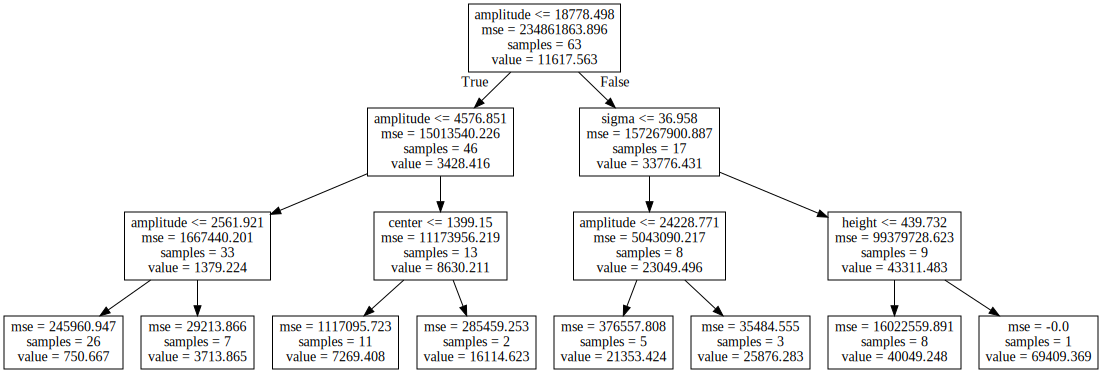

In [73]:
from IPython.display import SVG, display
display(SVG(graph.create_svg()))

40049.2477899551
Train error 2375050.3965310673
Test error 1223682.0854774436


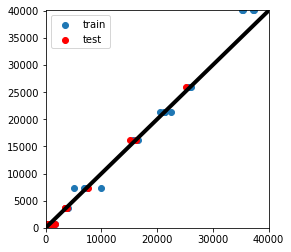

In [74]:
# make predictions on test and train set 
trainpred=DT.predict(train[['fraction','sigma','center','amplitude','fwhm','height']])
testpred=DT.predict(test[['fraction','sigma','center','amplitude','fwhm','height']])

maxlimit =testpred.max()
print(maxlimit)
#parity plot 
plt.figure(figsize=(4,4))
plt.xlim([0,maxlimit]);
plt.ylim([0,maxlimit]);
plt.scatter(train.auc,trainpred, label ='train')
plt.scatter(test.auc,testpred,color='r', label = 'test')
plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
plt.legend()
#calculate the test and train error
print("Train error",mean_squared_error(train.auc,trainpred))
print("Test error",mean_squared_error(test.auc,testpred))

In [75]:
trainerror = []
testerror = []

trees = np.arange(1,20,1)
#model=tree.DecisionTreeRegressor()

# loop over lambda values (strength of regularization)
for t in trees:
    model=tree.DecisionTreeRegressor(max_depth=t)
    model.fit(train[['fraction','sigma','center','amplitude','fwhm','height']],train.auc)
    trainerror.append(mean_squared_error(train.auc,model.predict(
        train[['fraction','sigma','center','amplitude','fwhm','height']])))
    testerror.append(mean_squared_error(test.auc,model.predict(
        test[['fraction','sigma','center','amplitude','fwhm','height']])))

Text(0, 0.5, 'MSE for $auc$')

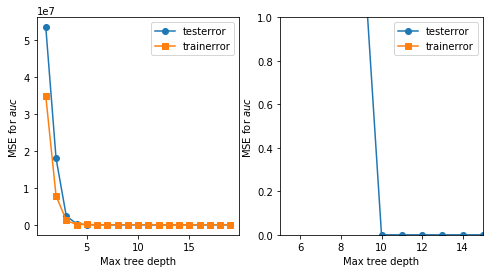

In [76]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $auc$')
plt.subplot(122)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.ylim((0,1))
plt.xlim((5,15))
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $auc$')

# Neural Networks 

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'keras'

In [ ]:
test_loss = estimator.model.evaluate(X_test, y_test)
print("test set mse is %.2f" % test_loss)

# fit_result[i][0] = p[i]_fraction
# fit_result[i][1] = p[i]_simga
# fit_result[i][2] = p[i]_center
# fit_result[i][3] = p[i]_amplitude
# fit_result[i][4] = p[i]_fwhm
# fit_result[i][5] = p[i]_height
# fit_result[i][6] = p[i]_area under the curve

In [ ]:
hdf5_filename = 'peakidentify_label_testdf.hdf5'
temp = 300
time = 25
peak = 'Peak_01'
label = '[Hydrogen]'

df = pd.DataFrame(add_label(hdf5_filename, temp, time, peak, label))